In [2]:
import os
from Agent import Agent
from itertools import chain
from PIL import Image
import numpy as np
from plotResult import plotOptimalThresh, plotTest_IOU, plotLoss_IOU



import importlib
import plotResult
importlib.reload(plotResult)

import Agent
importlib.reload(Agent)



<module 'Agent' from '/Users/jiten/Masters/WorkPlace/MRI Fractures Project/MyCode/Agent.py'>

In [3]:
# initialize the parameters

my_path = "/Users/jiten/Masters/WorkPlace/"
folder_path = os.getcwd() #"/Users/jiten/Masters/WorkPlace/MRI Fractures Project/"

folder_path = os.path.dirname(folder_path)

print(folder_path)

#source_folder = os.path.join(folder_path, 'SAGT1_Images')
train_dir_SAGT1 = os.path.join(folder_path, "train_data_SAGT1")
test_dir_SAGT1 = os.path.join(folder_path, "test_data_SAGT1")
    
train_dir_dict = {}
test_dir_dict ={}
val_dir_dict ={}

#val_dir = os.path.join(folder_path, "validate")
train_dir_SAGT1 = os.path.join(folder_path, "train_data_SAGT1")
test_dir_SAGT1 = os.path.join(folder_path, "test_data_SAGT1")
val_dir_SAGT1 = os.path.join(folder_path, "val_data_SAGT1")

train_dir_SAGIR = os.path.join(folder_path, "train_data_SAGIR")
test_dir_SAGIR = os.path.join(folder_path, "test_data_SAGIR")
val_dir_SAGIR = os.path.join(folder_path, "val_data_SAGIR")

train_dir_dict['SAGT1'] = train_dir_SAGT1
train_dir_dict['SAGIR'] = train_dir_SAGIR

test_dir_dict['SAGT1'] = test_dir_SAGT1
test_dir_dict['SAGIR'] = test_dir_SAGIR

val_dir_dict['SAGT1'] = val_dir_SAGT1
val_dir_dict['SAGIR'] = val_dir_SAGIR

# create the data structure for mask directories
train_mask_dir_dict = {}
test_mask_dir_dict = {}
val_mask_dir_dict = {}

train_mask_dir_SAGT1 = os.path.join(folder_path, "train_mask_SAGT1")
test_mask_dir_SAGT1 = os.path.join(folder_path, "test_mask_SAGT1")
val_mask_dir_SAGT1 = os.path.join(folder_path, "val_mask_SAGT1")

train_mask_dir_SAGIR = os.path.join(folder_path, "train_mask_SAGIR")
test_mask_dir_SAGIR = os.path.join(folder_path, "test_mask_SAGIR")
val_mask_dir_SAGIR = os.path.join(folder_path, "val_mask_SAGIR")

train_mask_dir_dict['SAGT1'] = train_mask_dir_SAGT1
train_mask_dir_dict['SAGIR'] = train_mask_dir_SAGIR

test_mask_dir_dict['SAGT1'] = test_mask_dir_SAGT1
test_mask_dir_dict['SAGIR'] = test_mask_dir_SAGIR

val_mask_dir_dict['SAGT1'] = val_mask_dir_SAGT1
val_mask_dir_dict['SAGIR'] = val_mask_dir_SAGIR

/Users/jiten/Masters/WorkPlace/MRI Fractures Project


In [5]:
img = 'SAGIR'
train_flag = True
#train_flag = False

# train_dir = train_dir_dict[img]
# mask_dir = train_mask_dir_dict[img]

# val_dir = val_dir_dict[img]
# mask_dir_val = val_mask_dir_dict[img]

# test_dir = test_dir_dict[img]
# mask_dir_test = test_mask_dir_dict[img]

In [7]:
# initialize the directory and get the model
if train_flag:
    train_dir = train_dir_dict[img]
    mask_dir = train_mask_dir_dict[img]

    val_dir = val_dir_dict[img]
    mask_dir_val = val_mask_dir_dict[img]

    # initialize agent
    agent = Agent.Agent(train_flag,img_dir=train_dir,msk_dir=mask_dir,folder_path=folder_path, val_dir=val_dir, msk_dir_val=mask_dir_val, 
                  state='new', num_epochs=200, batchSize=30, bilinear=False)
    agent.initializeUnet()

     # load custom dataset
    train_loader, val_loader = agent.loadCustomData()
        

mps
Initialize Custom Data
Augmentation ::: False
Train flag:: True
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/train_data_SAGIR
Total Size ::: 559
Initialize Custom Data
Total Size val::: 116


In [8]:
# run the model and get the predictions
if train_flag:
    # run the model
    loss_df, prediction_batch, iou_sore_df, loss_val_df, iou_score_val_df, prediction_batch_val = agent.runModel(train_loader, val_loader)

Epoch [1/200], Train( Loss: 0.3036, IoU_score: 0.0536 ) ::: Validation ( Loss: 0.2939, IoU_score: 0.0454 )
Epoch [2/200], Train( Loss: 0.2693, IoU_score: 0.0537 ) ::: Validation ( Loss: 0.2339, IoU_score: 0.0454 )
Epoch [3/200], Train( Loss: 0.2524, IoU_score: 0.0537 ) ::: Validation ( Loss: 0.2508, IoU_score: 0.0454 )
Epoch [4/200], Train( Loss: 0.2318, IoU_score: 0.0537 ) ::: Validation ( Loss: 0.2123, IoU_score: 0.0454 )
Epoch [5/200], Train( Loss: 0.2098, IoU_score: 0.0537 ) ::: Validation ( Loss: 0.1948, IoU_score: 0.0454 )
Epoch [6/200], Train( Loss: 0.1875, IoU_score: 0.0537 ) ::: Validation ( Loss: 0.1737, IoU_score: 0.0454 )
Epoch [7/200], Train( Loss: 0.1665, IoU_score: 0.0537 ) ::: Validation ( Loss: 0.1601, IoU_score: 0.0454 )
Epoch [8/200], Train( Loss: 0.1475, IoU_score: 0.0537 ) ::: Validation ( Loss: 0.1462, IoU_score: 0.0454 )
Epoch [9/200], Train( Loss: 0.1292, IoU_score: 0.0543 ) ::: Validation ( Loss: 0.1300, IoU_score: 0.0455 )
Epoch [10/200], Train( Loss: 0.1129, 

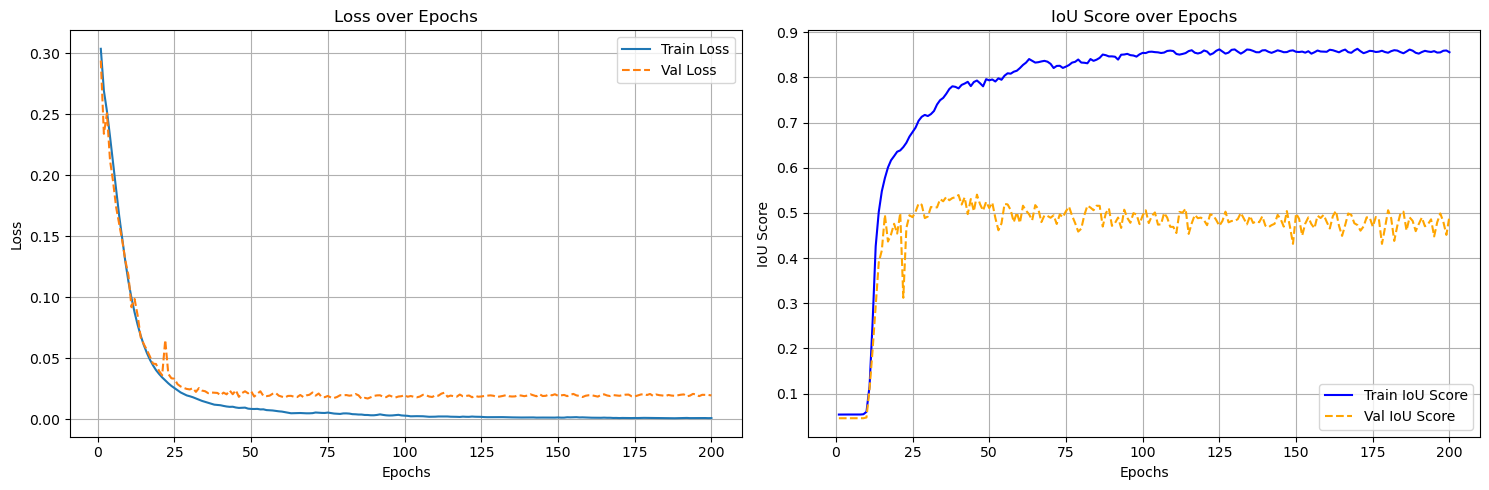

In [9]:
# plot the training and validaiton data
plotResult.plotLoss_IOU(loss_df, iou_sore_df, loss_val_df, iou_score_val_df)

In [10]:
 # join the list of prediction lists 
predictions = list(chain(*prediction_batch))
predictions_val = list(chain(*prediction_batch_val))

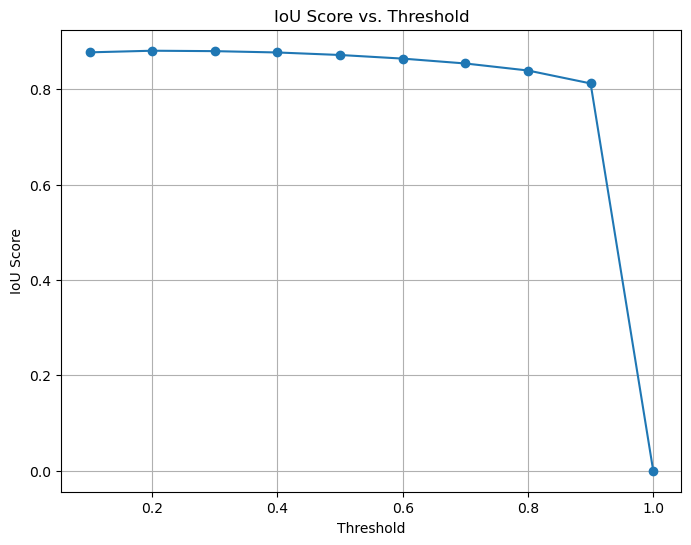

In [11]:
# check for optimal threshold for deciding the threshold for training
if train_flag:
    # compute an optimal threshold
    iou_vs_thresh = agent.optimalThresVsIoU(train_loader, predictions)
    plotOptimalThresh(iou_vs_thresh)

P088 SAGIR_020.jpg


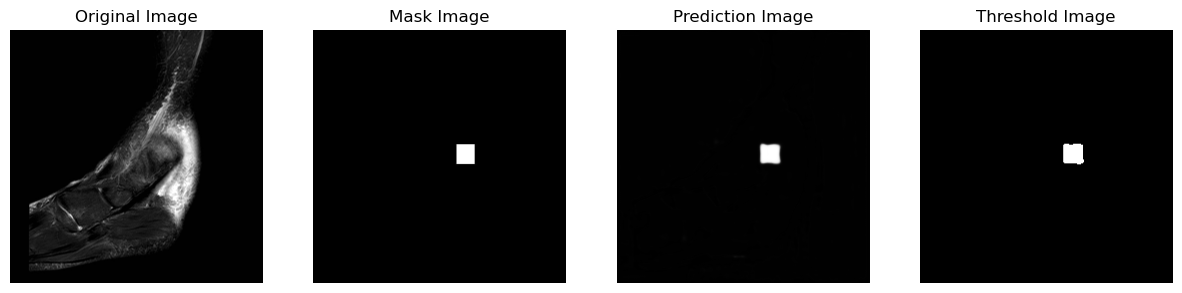

P089 SAGIR_012.jpg


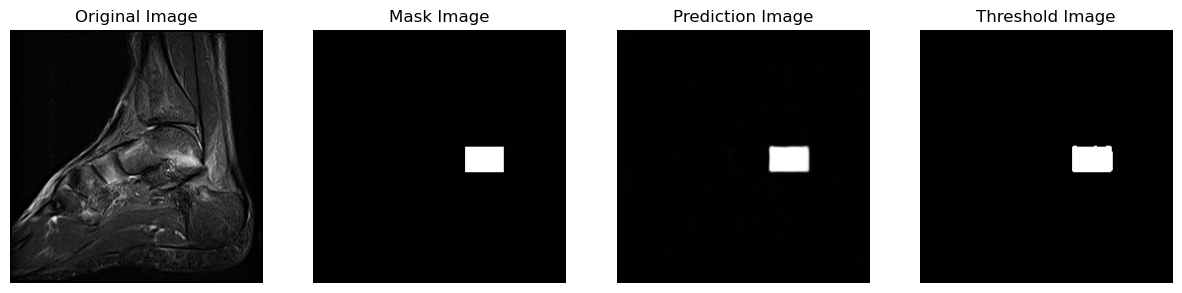

P047 SAGIR_014.jpg


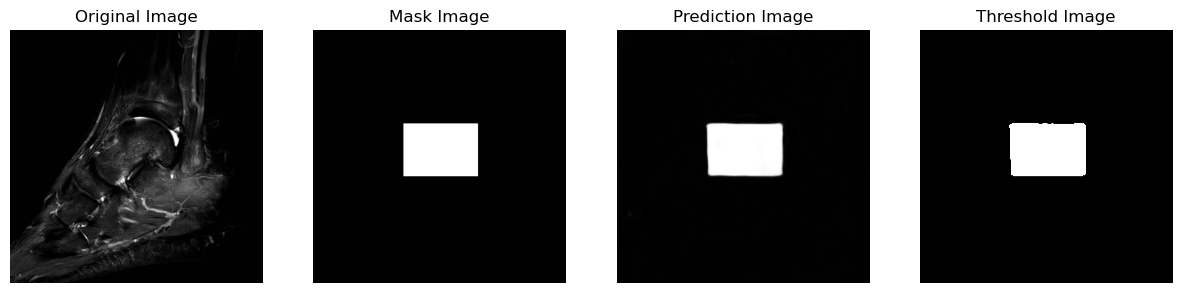

P009 SAGIR_013.jpg


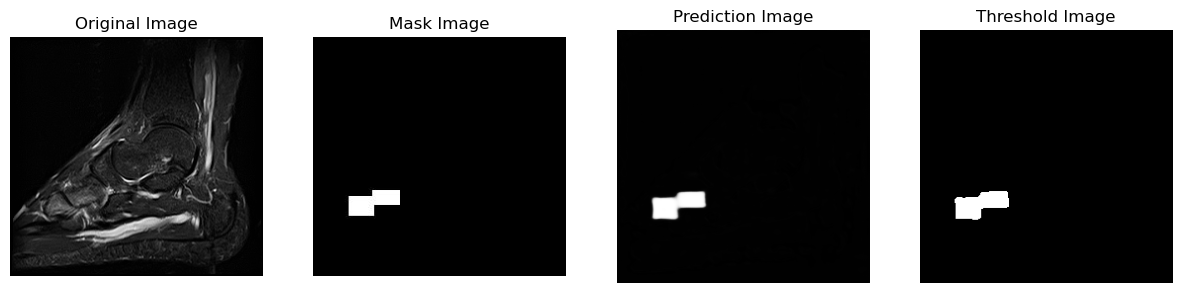

P034 SAGIR_012.jpg


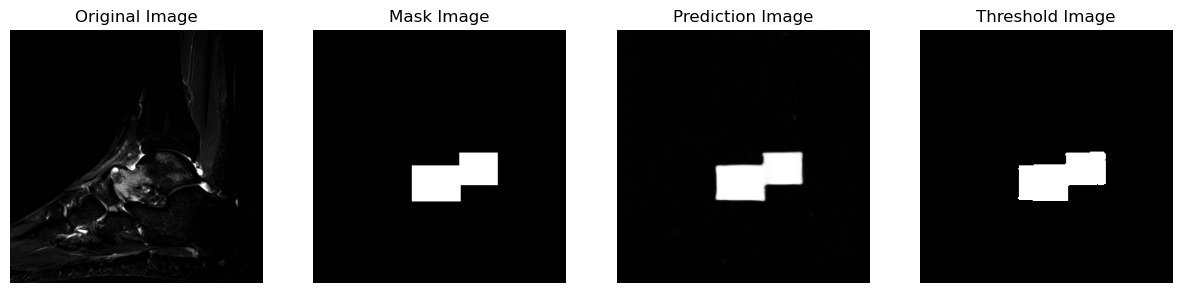

P023 SAGIR_012.jpg


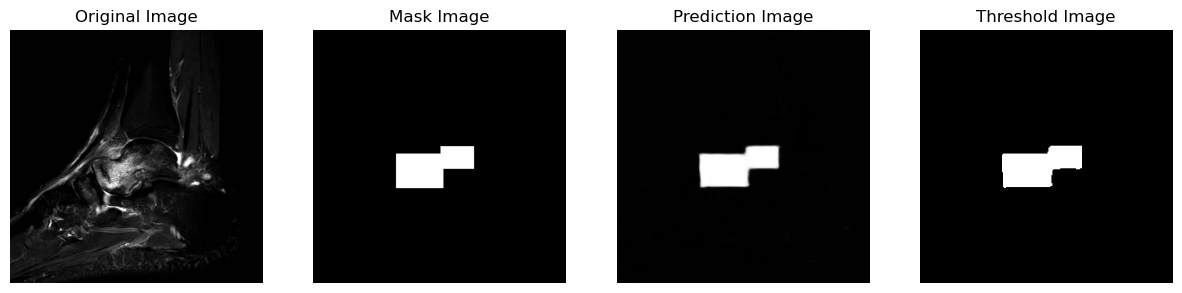

P079 SAGIR_004.jpg


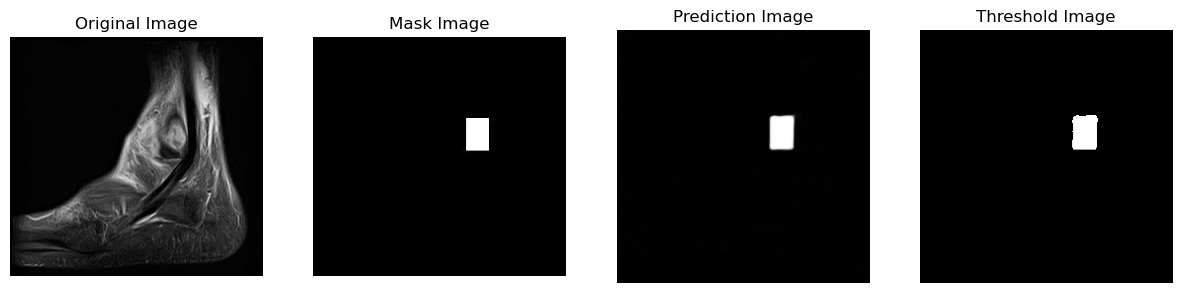

P050 SAGIR_014.jpg


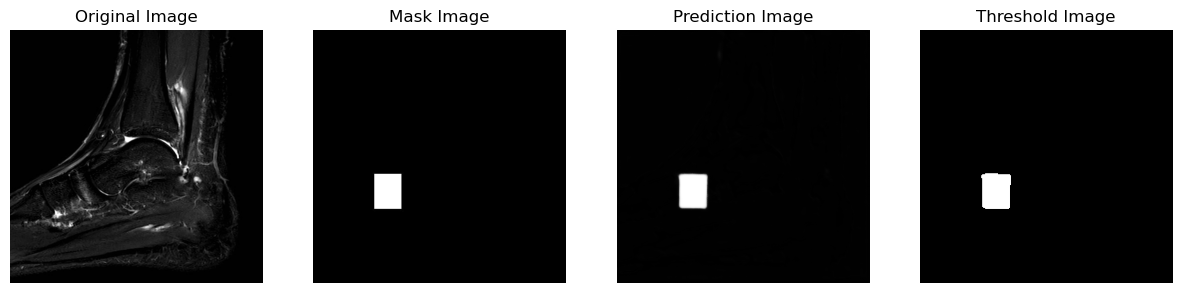

P036 SAGIR_018.jpg


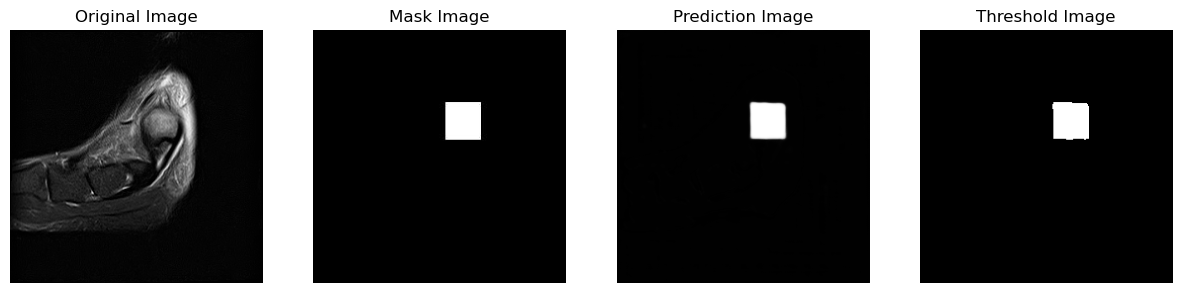

P050 SAGIR_015.jpg


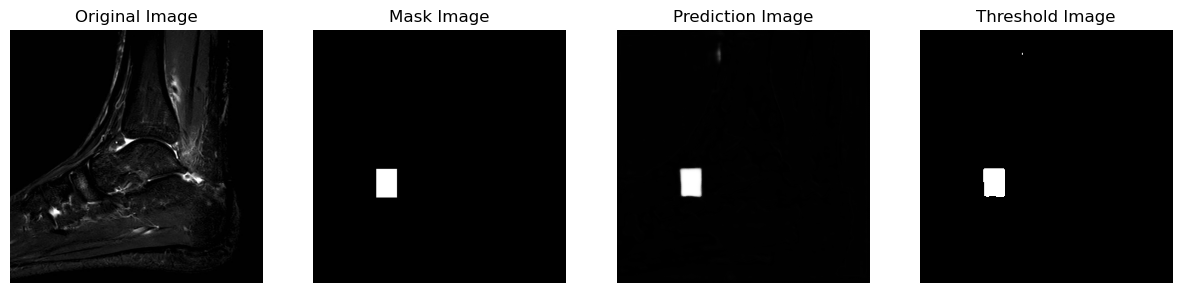

In [12]:
# writ the data
if train_flag:
    # plot few results
    agent.printPrediction(loader=train_loader, preds=predictions)


P055 SAGIR_009.jpg


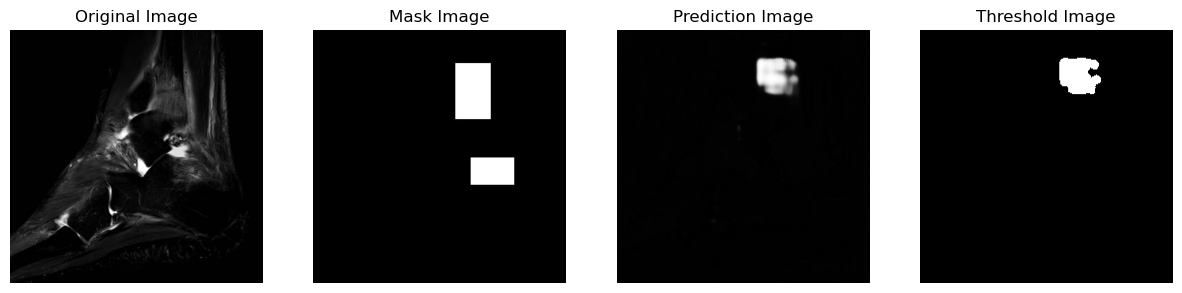

P051 SAGIR_008.jpg


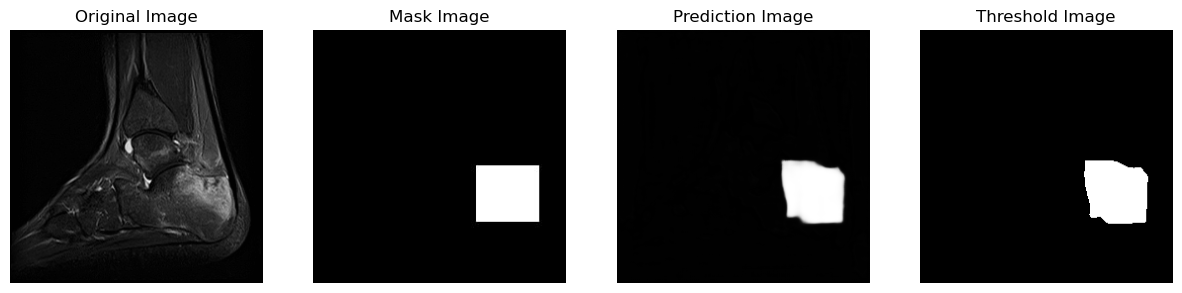

P051 SAGIR_009.jpg


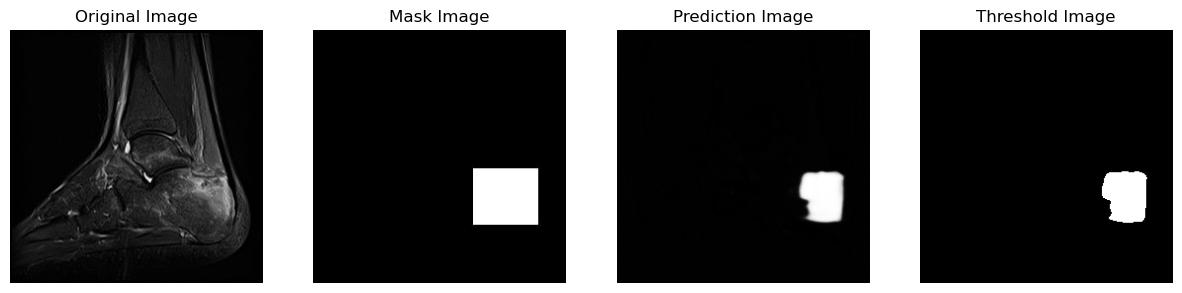

P055 SAGIR_008.jpg


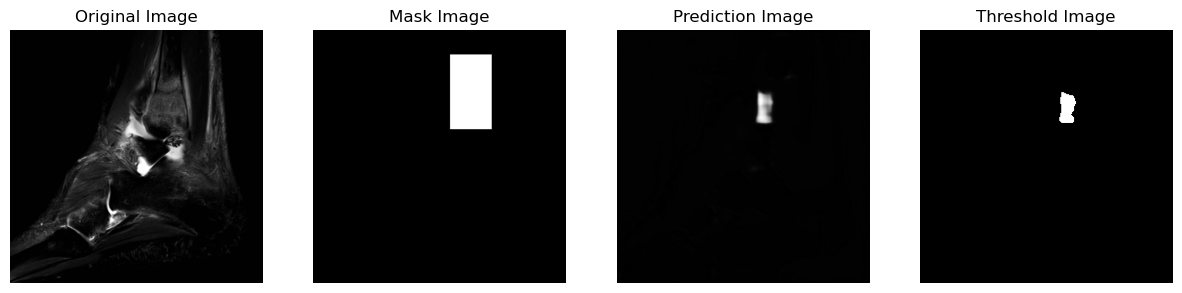

P031 SAGIR_018.jpg


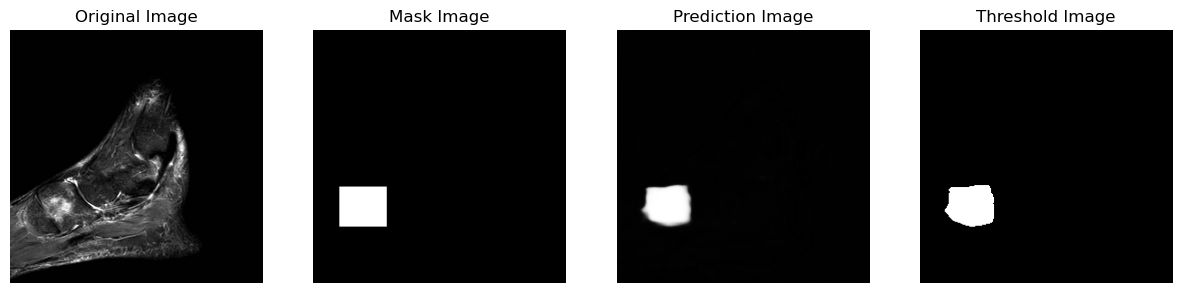

P031 SAGIR_019.jpg


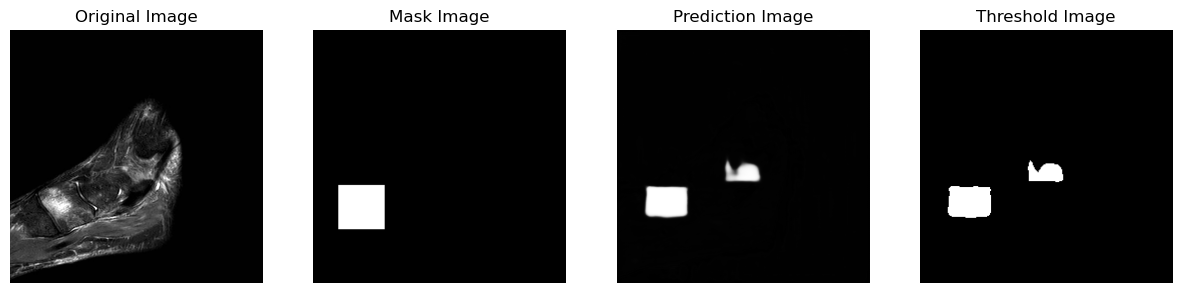

P096 SAGIR_009.jpg


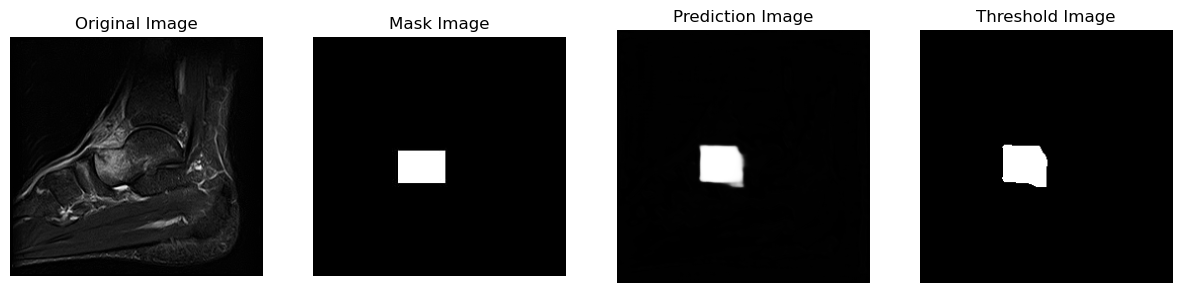

P003 SAGIR_017.jpg


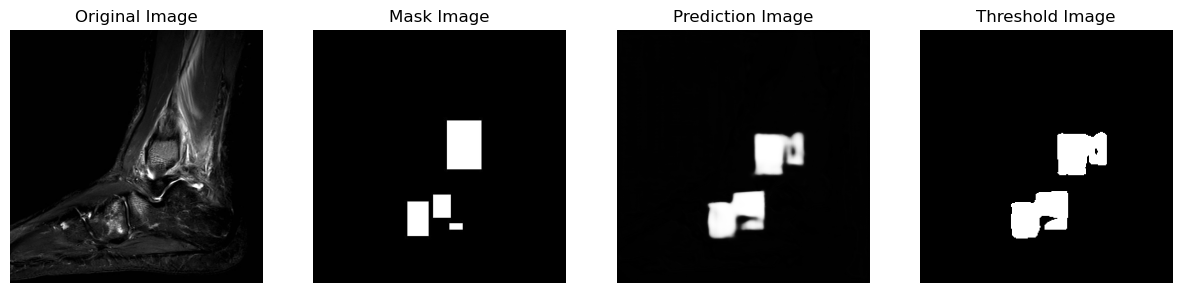

P094 SAGIR_016.jpg


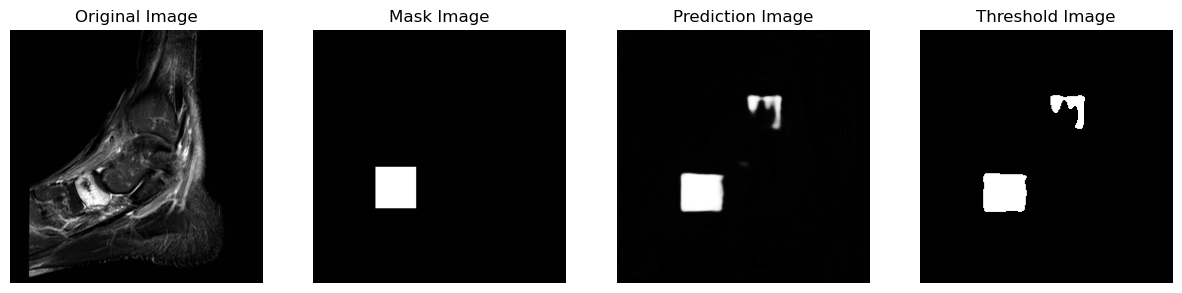

P093 SAGIR_006.jpg


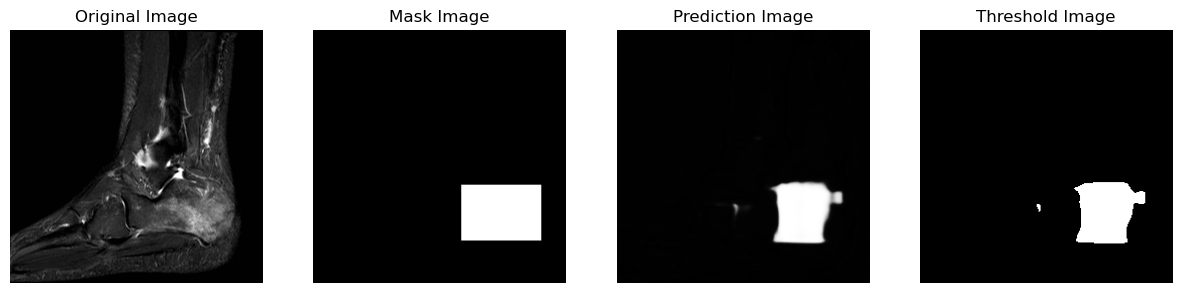

In [13]:
# Print few validation results
# plot few results
agent.printPrediction(loader=val_loader, preds=predictions_val, idx=10, validation=True)

In [14]:
# write the data to the files and save the net
w_path = os.path.join(folder_path,"Result","IoUScore.csv")
agent.writeRun(iou_sore_df,w_path)

# write the loss data
w_path = os.path.join(folder_path,"Result","LossOutput.csv")
agent.writeRun(loss_df,w_path)

# save the net
agent.save_net(file_name='UNet1')

In [15]:
train_flag = False

# set the directories
test_dir = test_dir_dict[img]
mask_dir_test = test_mask_dir_dict[img]

# initialize the agent , pass the batchSize as the no.of images in the test , state as old to initialize existing model
agent_test = Agent.Agent(train_flag,img_dir=test_dir,msk_dir=mask_dir_test,folder_path=folder_path, state='old',num_epochs=1, batchSize=185, bilinear=False)
agent_test.initializeUnet('UNet1Jul 01, 2024 12_45PM')

test_loader = agent_test.loadCustomData()

mps
Initialize Custom Data
Augmentation ::: False
Train flag:: False
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/test_data_SAGIR
Total Size ::: 185


0.4307142596809704
Iou Score ::::0.4307142596809704
185


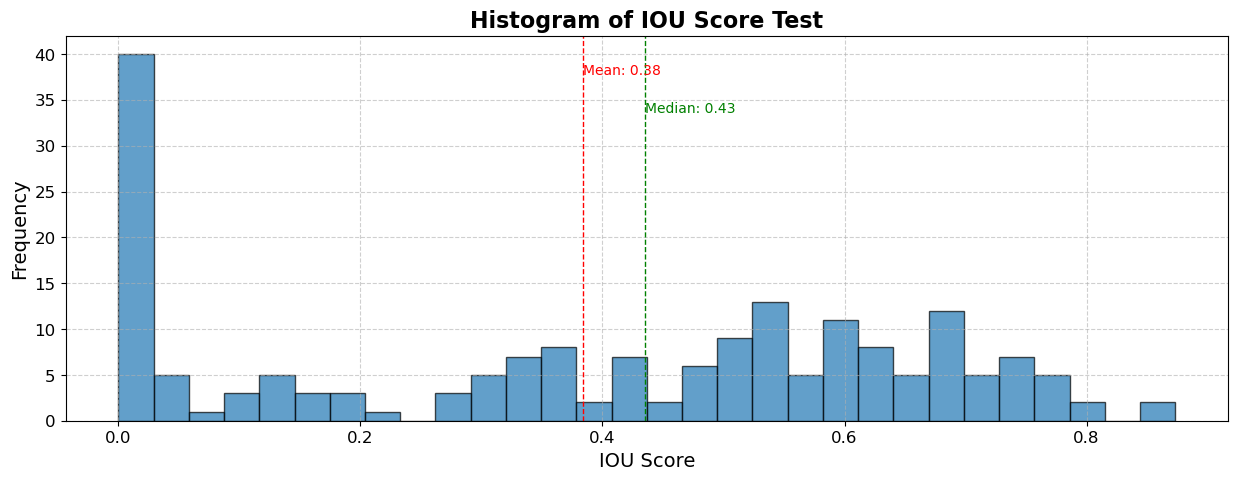

In [16]:
# run the model for test and check the iou and histogram
prediction_batch_test, iou_score_batch_test, iou_score_each_test = agent_test.runModel(test_loader)
print(len(iou_score_each_test))
# plot the testing iou histogram
plotResult.plotTest_IOU(iou_score_each_test)

### Train experiment with Data Augmentation

In [17]:
train_flag = True
# initialize agent
agent_aug = Agent.Agent(train_flag,img_dir=train_dir,msk_dir=mask_dir,folder_path=folder_path, val_dir=val_dir, msk_dir_val=mask_dir_val, 
                state='new', num_epochs=200, batchSize=30, bilinear=False)
agent_aug.initializeUnet()

# load custom dataset
train_loader, val_loader = agent_aug.loadCustomData(augment=True)

mps
Initialize Custom Data
Augmentation Initialized
Augmentation ::: True
Train flag:: True
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/train_data_SAGIR
Total Size ::: 1118
Initialize Custom Data
Total Size val::: 116


In [18]:
# rum the model fwith the augmented data
loss_aug_df, prediction_aug_batch, iou_sore_aug_df, loss_aug_val_df, iou_score_aug_val_df, prediction__aug_batch_val = agent_aug.runModel(train_loader, val_loader)

Epoch [1/200], Train( Loss: 0.2822, IoU_score: 0.0538 ) ::: Validation ( Loss: 0.2509, IoU_score: 0.0454 )
Epoch [2/200], Train( Loss: 0.2269, IoU_score: 0.0538 ) ::: Validation ( Loss: 0.2094, IoU_score: 0.0454 )
Epoch [3/200], Train( Loss: 0.2012, IoU_score: 0.0538 ) ::: Validation ( Loss: 0.1935, IoU_score: 0.0454 )
Epoch [4/200], Train( Loss: 0.1782, IoU_score: 0.0538 ) ::: Validation ( Loss: 0.1742, IoU_score: 0.0454 )
Epoch [5/200], Train( Loss: 0.1559, IoU_score: 0.0538 ) ::: Validation ( Loss: 0.1477, IoU_score: 0.0454 )
Epoch [6/200], Train( Loss: 0.1349, IoU_score: 0.0538 ) ::: Validation ( Loss: 0.1222, IoU_score: 0.0456 )
Epoch [7/200], Train( Loss: 0.1166, IoU_score: 0.0628 ) ::: Validation ( Loss: 0.1024, IoU_score: 0.0908 )
Epoch [8/200], Train( Loss: 0.1005, IoU_score: 0.1150 ) ::: Validation ( Loss: 0.0906, IoU_score: 0.1624 )
Epoch [9/200], Train( Loss: 0.0864, IoU_score: 0.2407 ) ::: Validation ( Loss: 0.0794, IoU_score: 0.3845 )
Epoch [10/200], Train( Loss: 0.0751, 

In [19]:
 # join the list of prediction lists 
predictions_aug = list(chain(*prediction_aug_batch))
predictions_aug_val = list(chain(*prediction__aug_batch_val))

P096 SAGIR_009.jpg


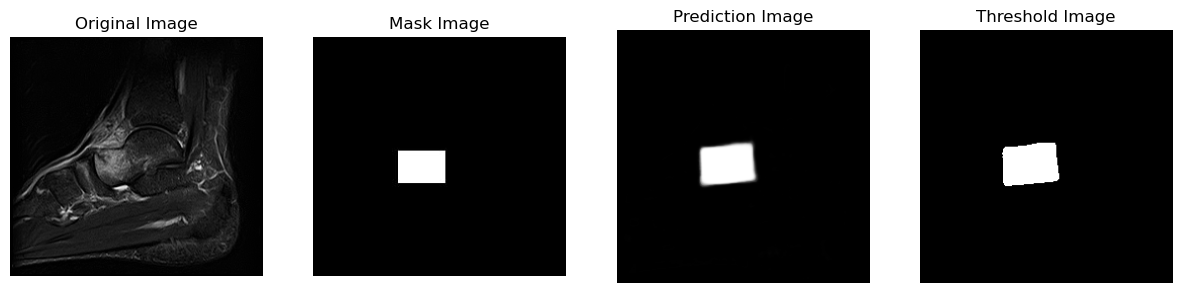

P003 SAGIR_017.jpg


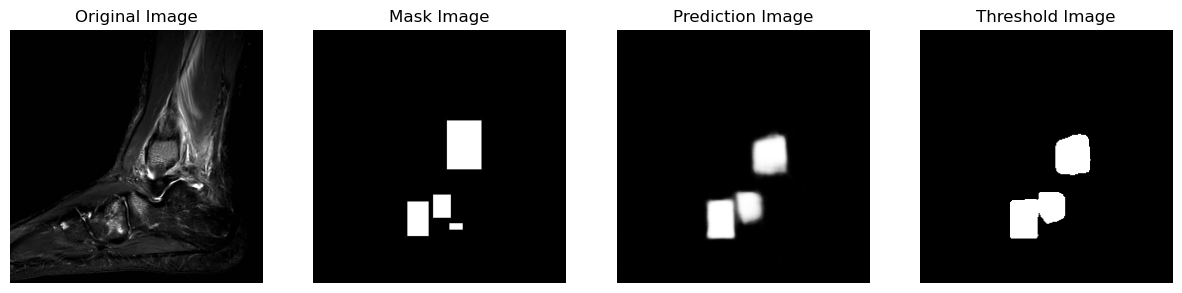

P094 SAGIR_016.jpg


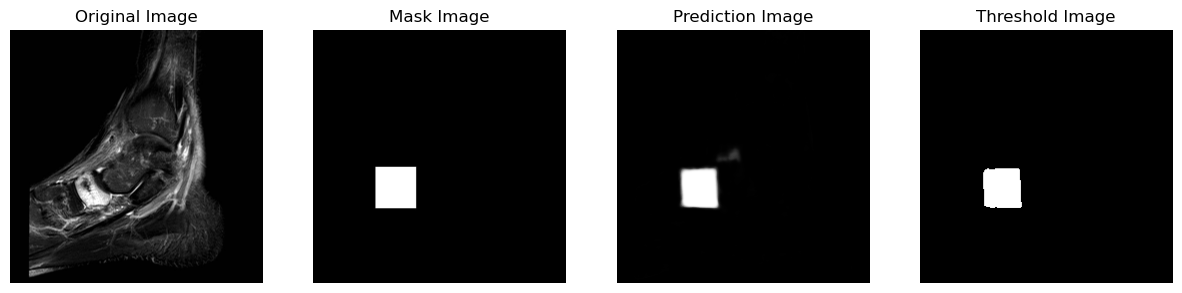

P093 SAGIR_006.jpg


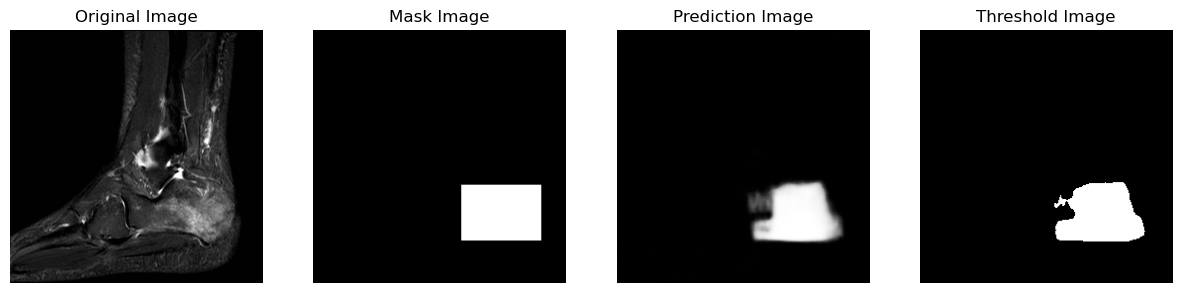

P074 SAGIR_010.jpg


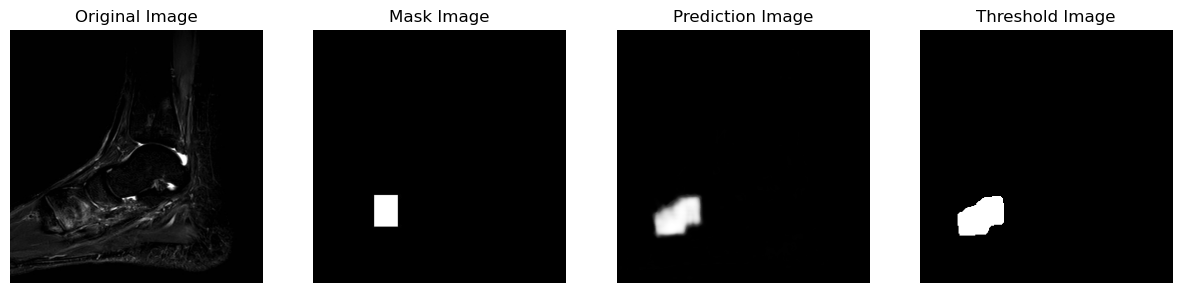

P093 SAGIR_012.jpg


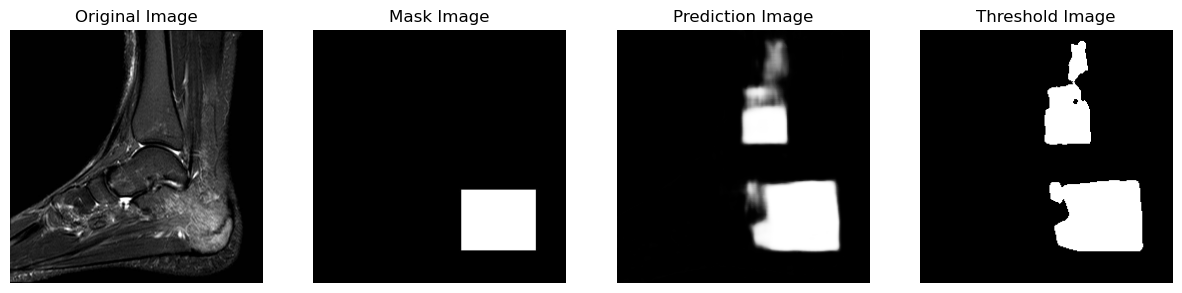

P007 SAGIR_016.jpg


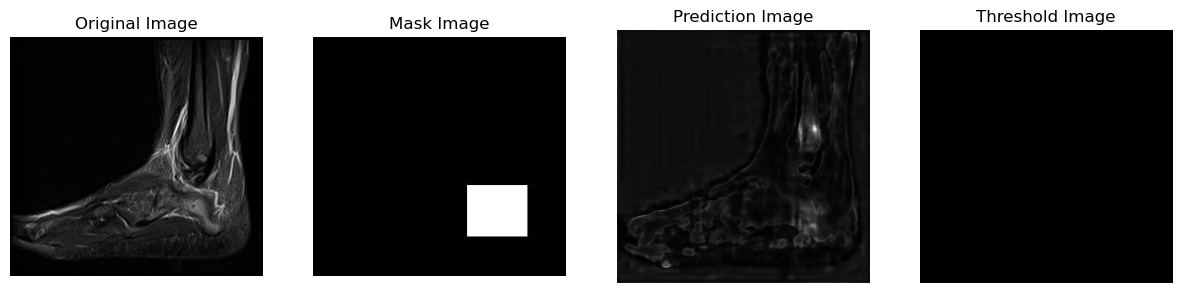

P004 SAGIR_013.jpg


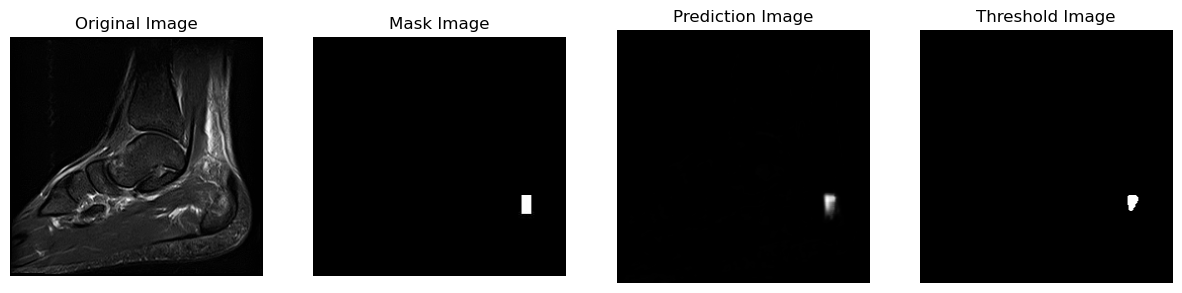

P004 SAGIR_012.jpg


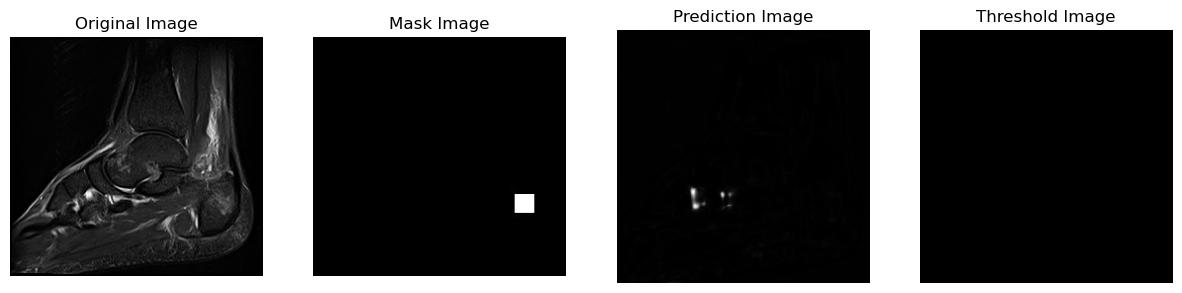

P093 SAGIR_013.jpg


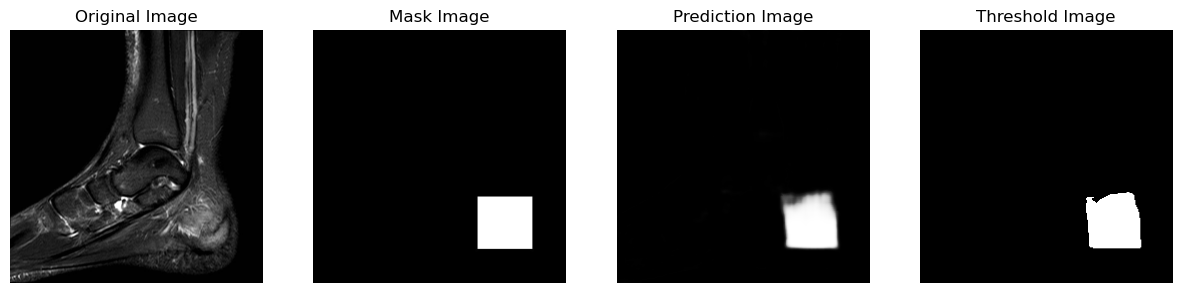

In [20]:
 # plot few results
agent_aug.printPrediction(loader=val_loader, idx=16, preds=predictions_aug_val, validation=True)

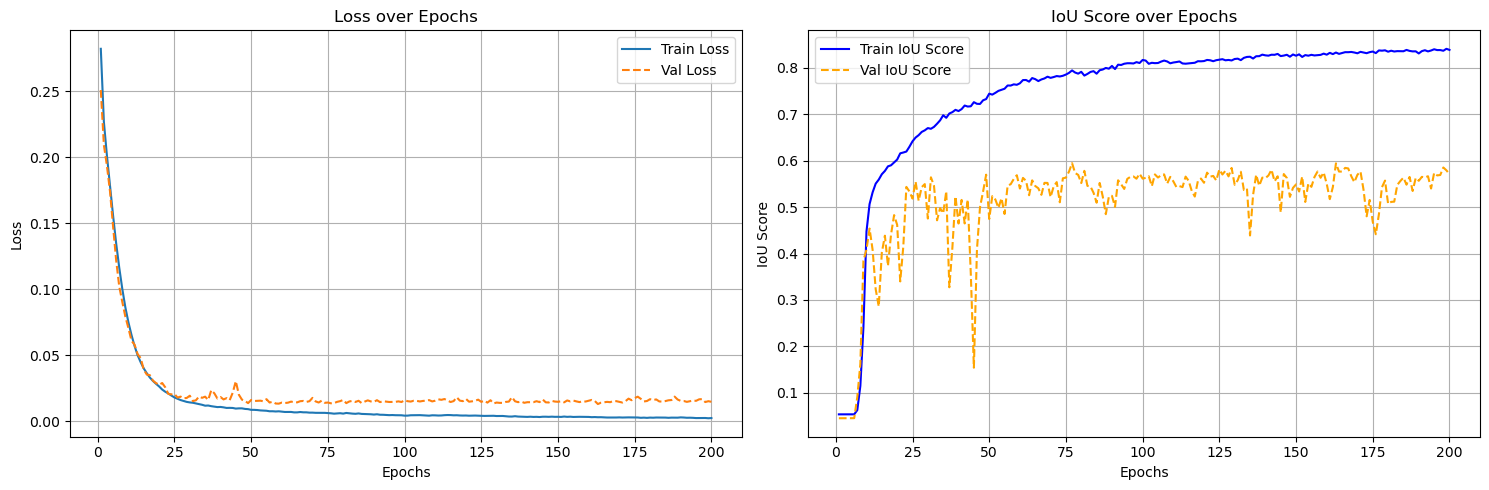

In [21]:
# plot the training and validaiton data
plotResult.plotLoss_IOU(loss_aug_df, iou_sore_aug_df, loss_aug_val_df, iou_score_aug_val_df)

In [22]:
# write the data to the files and save the net
w_path = os.path.join(folder_path,"Result","IoUScore_aug.csv")
agent_aug.writeRun(iou_sore_aug_df,w_path)

# write the loss data
w_path = os.path.join(folder_path,"Result","LossOutput_aug.csv")
agent_aug.writeRun(loss_aug_df,w_path)

# save the net
agent_aug.save_net(file_name='UNet_aug')

### Test the Model with the model trained with augmented data

In [25]:
train_flag = False

# set the directories
#test_dir = test_dir_dict[img]
#mask_dir_test = test_mask_dir_dict[img]

# initialize the agent , pass the batchSize as the no.of images in the test , state as old to initialize existing model
agent_test = Agent.Agent(train_flag,img_dir=test_dir,msk_dir=mask_dir_test,folder_path=folder_path, state='old',num_epochs=1, batchSize=186, bilinear=False)
agent_test.initializeUnet('UNet_augJul 01, 2024 01_34PM')

test_loader_aug = agent_test.loadCustomData()

mps
Initialize Custom Data
Augmentation ::: False
Train flag:: False
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/test_data_SAGIR
Total Size ::: 185


0.4865433171012404
Iou Score ::::0.4865433171012404
185


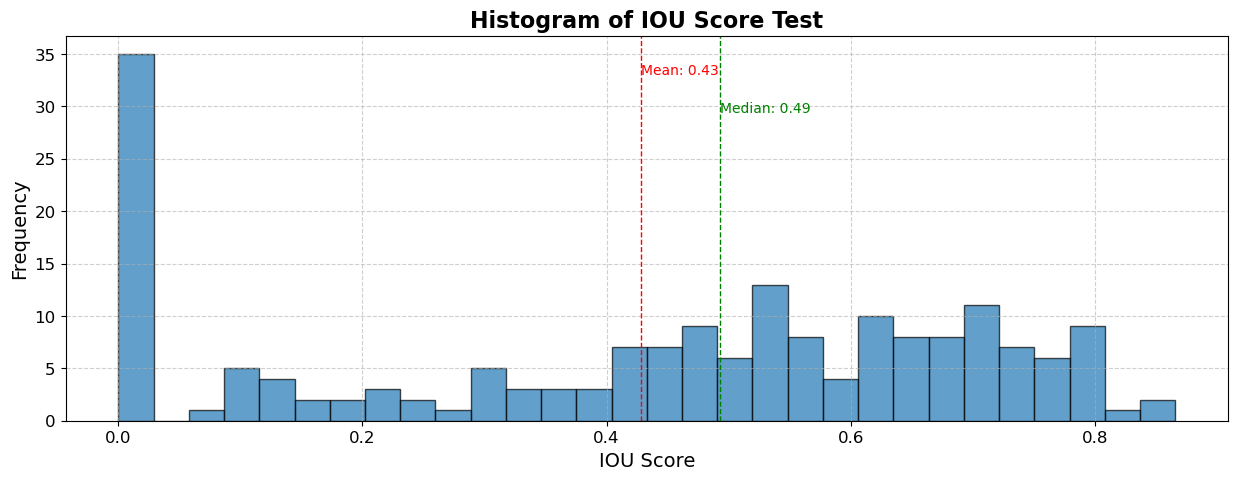

In [26]:

prediction_batch_test, iou_score_batch_test, iou_score_each_test = agent_test.runModel(test_loader_aug)
print(len(iou_score_each_test))
# plot the testing iou histogram
plotResult.plotTest_IOU(iou_score_each_test)

In [27]:
# join the predictions of the test
predictions_test = list(chain(*prediction_batch_test))

P053 SAGIR_010.jpg


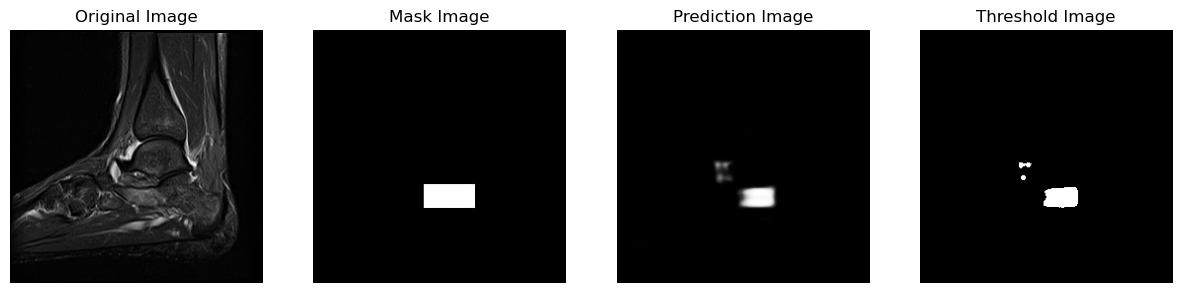

P020 SAGIR_016.jpg


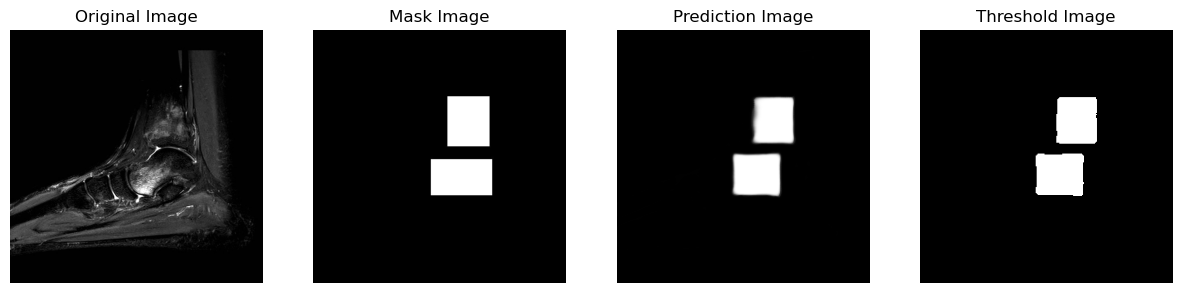

P035 SAGIR_009.jpg


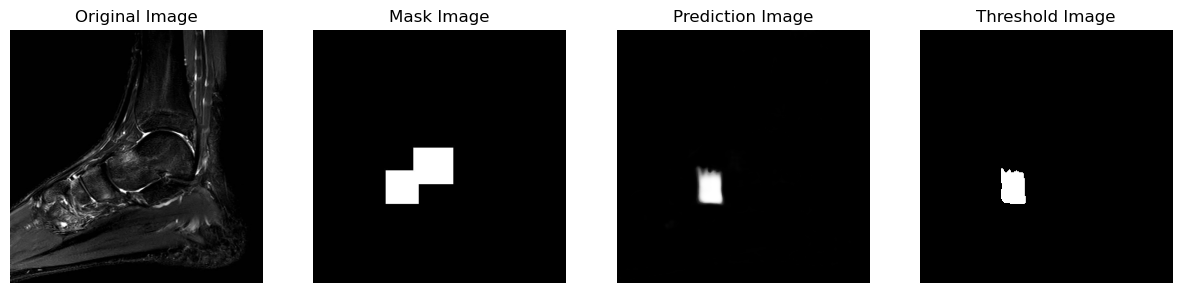

P027 SAGIR_012.jpg


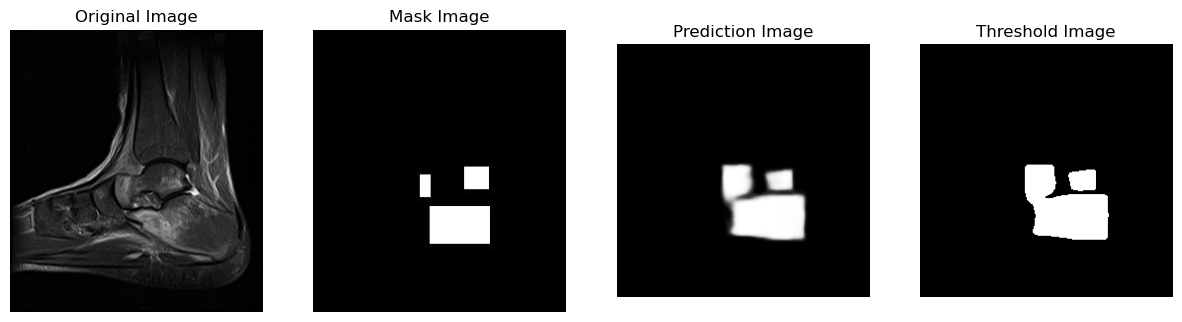

P057 SAGIR_011.jpg


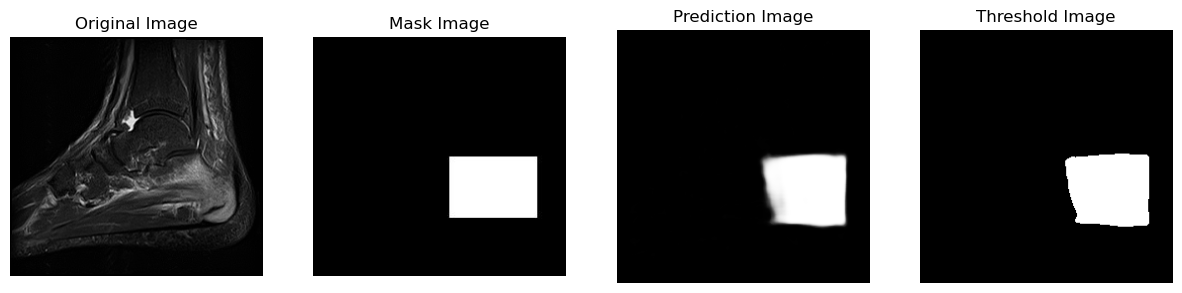

P024 SAGIR_017.jpg


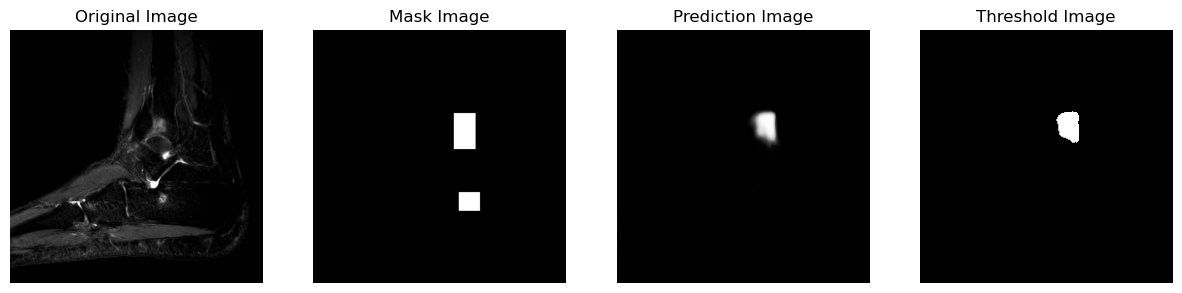

P056 SAGIR_009.jpg


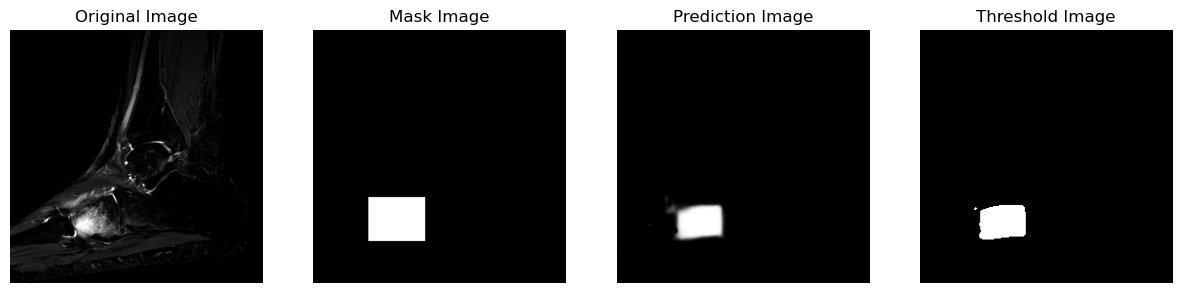

P024 SAGIR_015.jpg


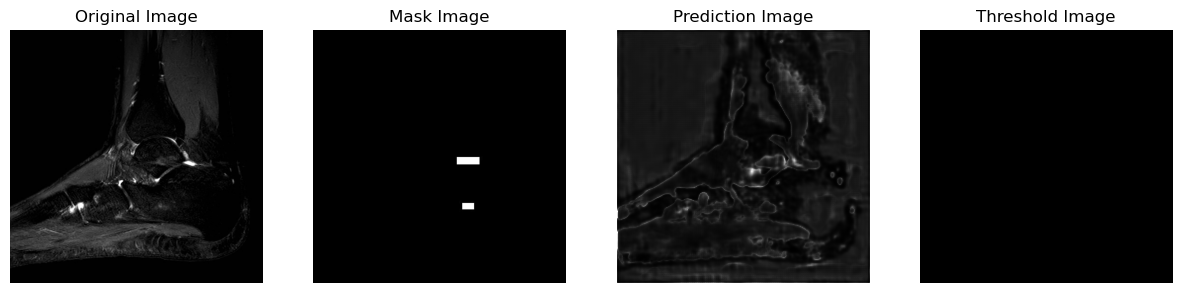

P057 SAGIR_013.jpg


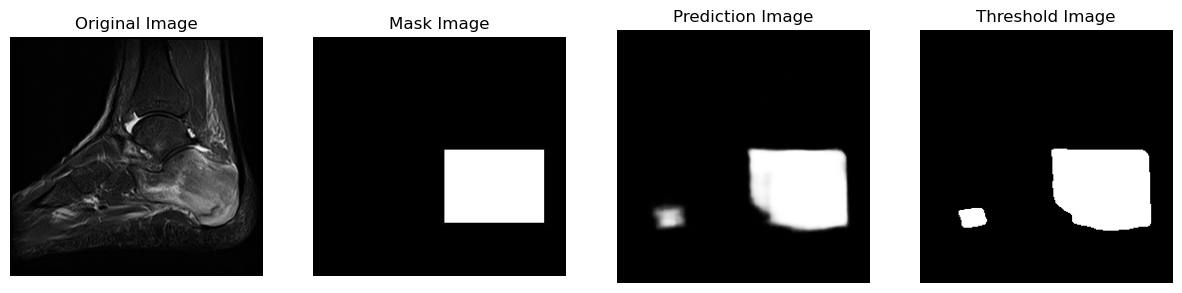

P027 SAGIR_010.jpg


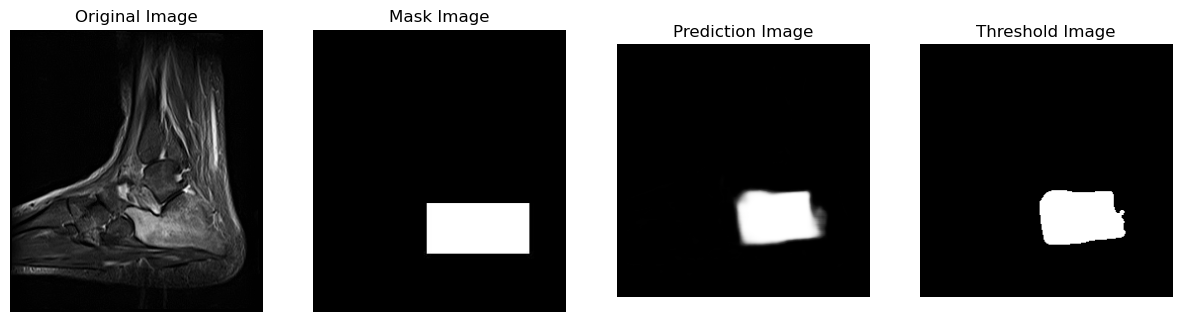

In [37]:

# plot few results
agent_test.printPrediction(loader=test_loader_aug, idx=10, preds=predictions_test)

#agent.savePredictions(loader=test_loader, predictions=predictions)

### Train with L2 Regularization (Weighted Decay) with early stopping

In [38]:
train_flag = True

 # initialize agent
agent_l2 = Agent.Agent(train_flag,img_dir=train_dir,msk_dir=mask_dir,folder_path=folder_path, val_dir=val_dir, msk_dir_val=mask_dir_val, 
                  state='new', num_epochs=200, batchSize=30, bilinear=False)
agent_l2.initializeUnet()

# load custom dataset
train_loader_l2, val_loader_l2 = agent_l2.loadCustomData(augment=True)

mps
Initialize Custom Data
Augmentation Initialized
Augmentation ::: True
Train flag:: True
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/train_data_SAGIR
Total Size ::: 1118
Initialize Custom Data
Total Size val::: 116


In [39]:
# run the model
loss_df_l2, prediction_batch_l2, iou_sore_df_l2, loss_val_df_l2, iou_score_val_df_l2, prediction_batch_val_l2 = agent_l2.runModel(train_loader_l2, 
                                                                                                                                  val_loader_l2,
                                                                                                                                  earlyStop=True, 
                                                                                                                                  L2Reg=True)

Epoch [1/200], Train( Loss: 0.1099, IoU_score: 0.1098 ) ::: Validation ( Loss: 0.1042, IoU_score: 0.0361 )
Epoch [2/200], Train( Loss: 0.0768, IoU_score: 0.2547 ) ::: Validation ( Loss: 0.0597, IoU_score: 0.2745 )
Epoch [3/200], Train( Loss: 0.0582, IoU_score: 0.3932 ) ::: Validation ( Loss: 0.0915, IoU_score: 0.1176 )
EarlyStopping counter: 1 out of 5
Epoch [4/200], Train( Loss: 0.0472, IoU_score: 0.4408 ) ::: Validation ( Loss: 0.0499, IoU_score: 0.2307 )
Epoch [5/200], Train( Loss: 0.0397, IoU_score: 0.4835 ) ::: Validation ( Loss: 0.0378, IoU_score: 0.3599 )
Epoch [6/200], Train( Loss: 0.0349, IoU_score: 0.5095 ) ::: Validation ( Loss: 0.0318, IoU_score: 0.3661 )
Epoch [7/200], Train( Loss: 0.0319, IoU_score: 0.5237 ) ::: Validation ( Loss: 0.0328, IoU_score: 0.2087 )
EarlyStopping counter: 1 out of 5
Epoch [8/200], Train( Loss: 0.0298, IoU_score: 0.5352 ) ::: Validation ( Loss: 0.0319, IoU_score: 0.1859 )
EarlyStopping counter: 2 out of 5
Epoch [9/200], Train( Loss: 0.0282, IoU_sc

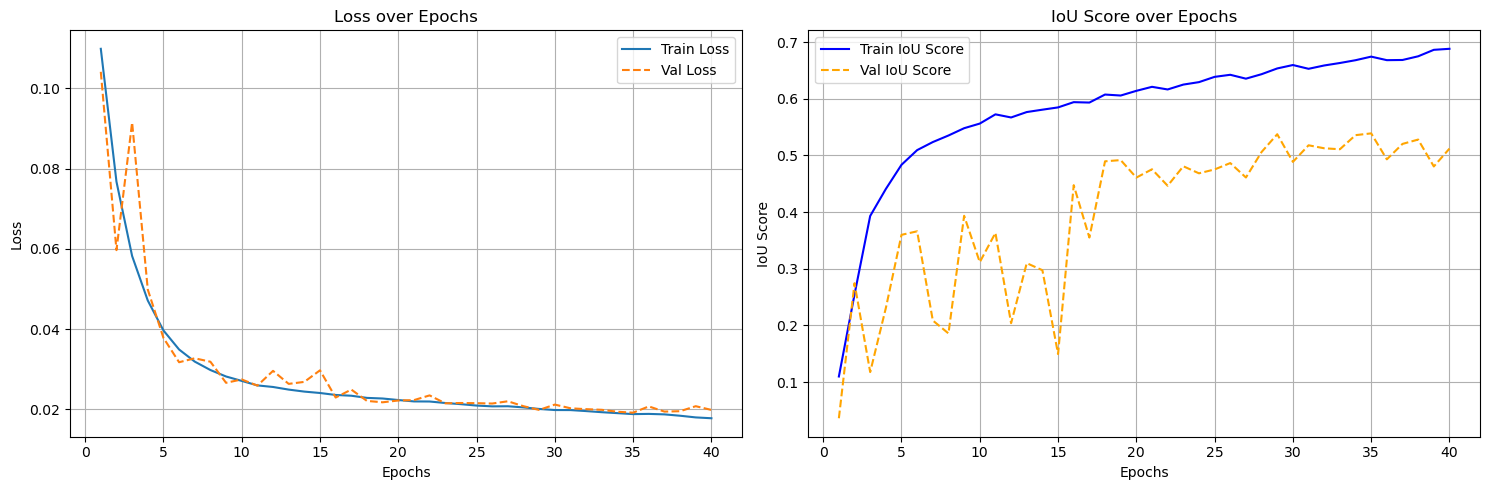

In [40]:
# plot the training and validaiton data
plotResult.plotLoss_IOU(loss_df_l2, iou_sore_df_l2, loss_val_df_l2, iou_score_val_df_l2)

In [41]:
# write the data to the files and save the net
w_path = os.path.join(folder_path,"Result","IoUScore_l2.csv")
agent_l2.writeRun(iou_sore_df_l2,w_path)

# write the loss data
w_path = os.path.join(folder_path,"Result","LossOutput_l2.csv")
agent_l2.writeRun(loss_df_l2,w_path)

# save the net
agent_l2.save_net(file_name='UNet_l2')

### Test this saved model

In [42]:
train_flag = False

# set the directories
#test_dir = test_dir_dict[img]
#mask_dir_test = test_mask_dir_dict[img]

# initialize the agent , pass the batchSize as the no.of images in the test , state as old to initialize existing model
agent_test_l2 = Agent.Agent(train_flag,img_dir=test_dir,msk_dir=mask_dir_test,folder_path=folder_path, state='old',num_epochs=1, batchSize=186, bilinear=False)
agent_test_l2.initializeUnet('UNet_l2Jul 01, 2024 02_16PM')

test_loader_l2 = agent_test_l2.loadCustomData()

mps
Initialize Custom Data
Augmentation ::: False
Train flag:: False
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/test_data_SAGIR
Total Size ::: 185


0.5359823727530113
Iou Score ::::0.5359823727530113
185


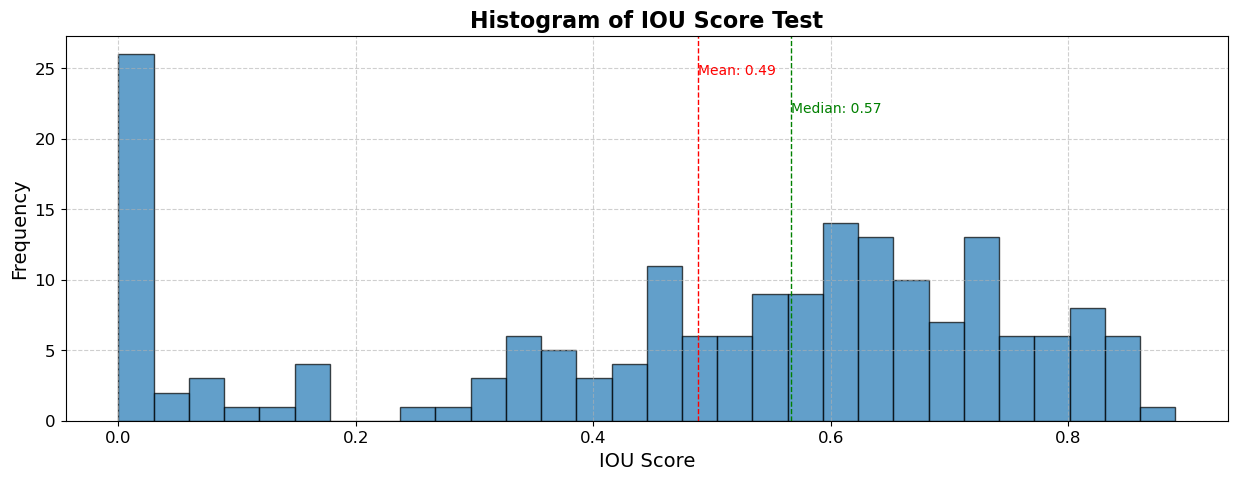

In [43]:
prediction_batch_test_l2, iou_score_batch_test_l2, iou_score_each_test_l2 = agent_test_l2.runModel(test_loader_l2)
print(len(iou_score_each_test_l2))
# plot the testing iou histogram
plotResult.plotTest_IOU(iou_score_each_test_l2)

In [44]:
# join the predictions of the test
predictions_test_l2 = list(chain(*prediction_batch_test_l2))

P020 SAGIR_016.jpg


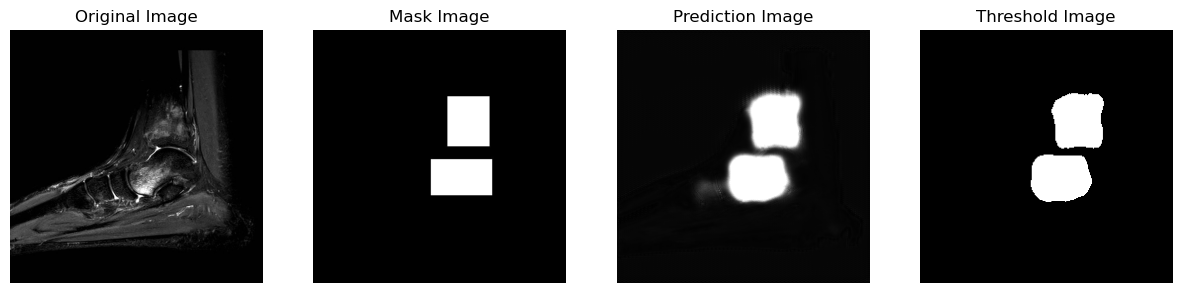

P035 SAGIR_009.jpg


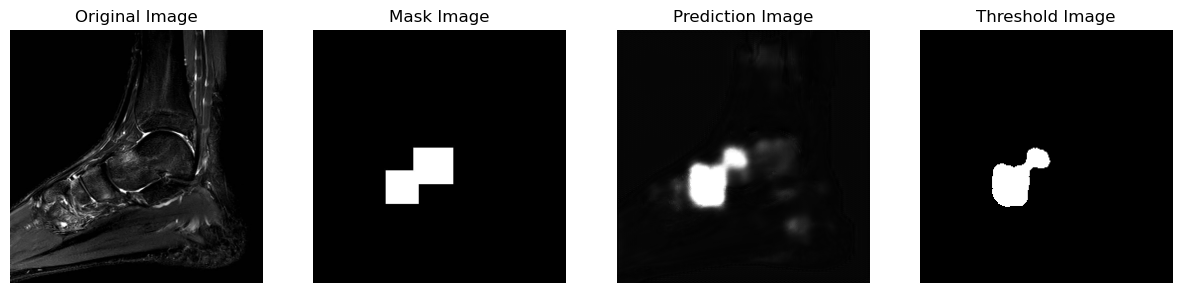

P027 SAGIR_012.jpg


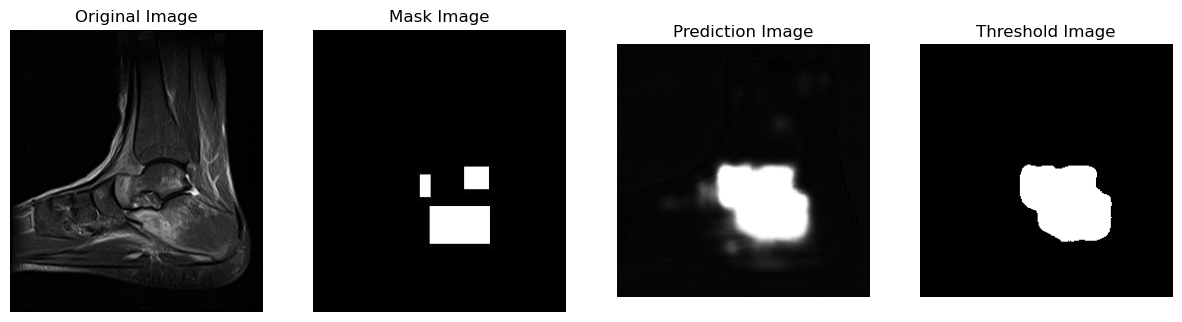

P057 SAGIR_011.jpg


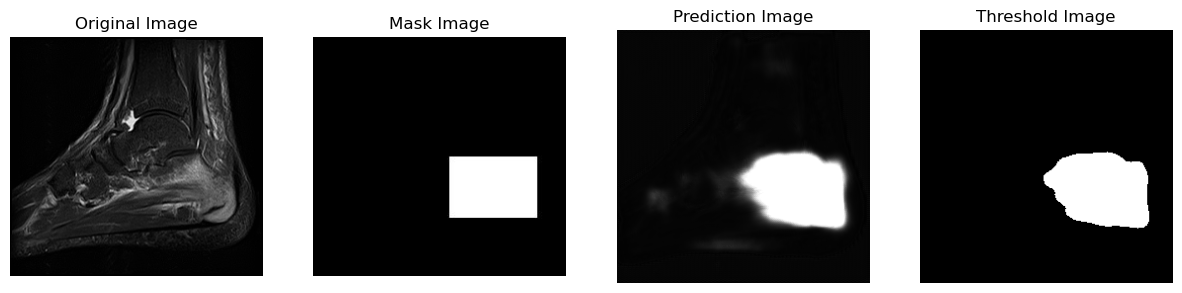

P024 SAGIR_017.jpg


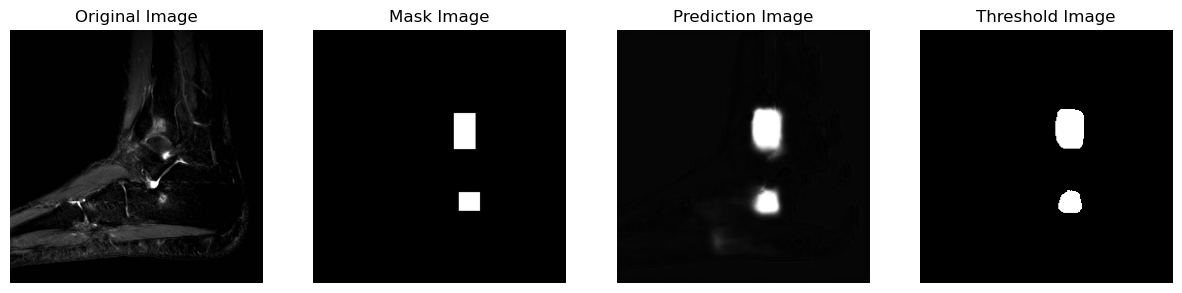

P056 SAGIR_009.jpg


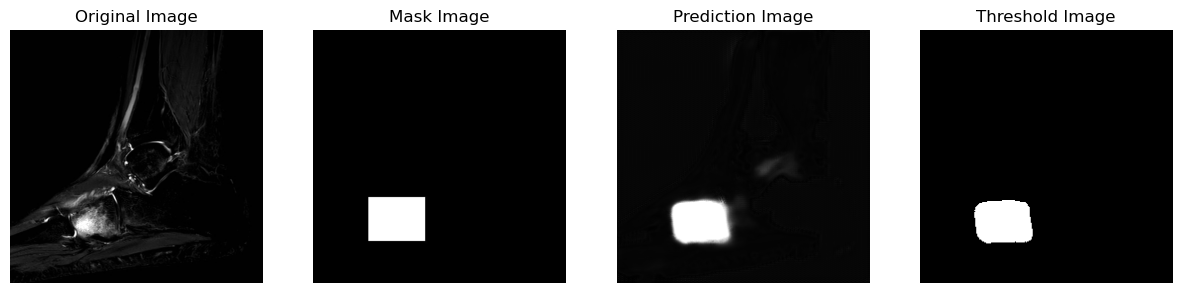

P024 SAGIR_015.jpg


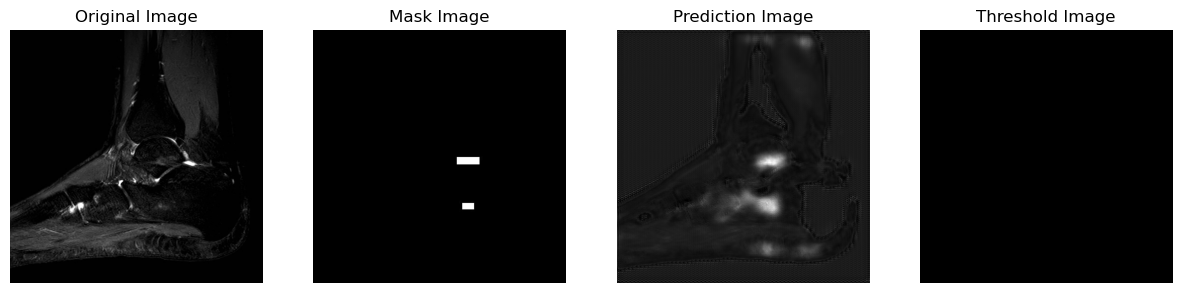

P057 SAGIR_013.jpg


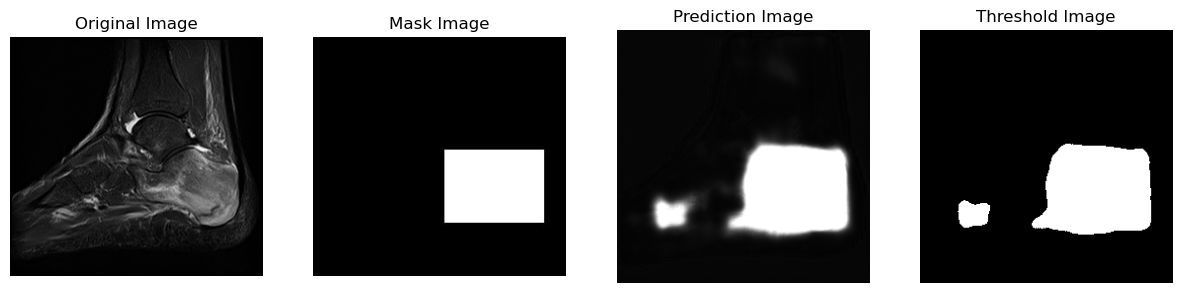

P027 SAGIR_010.jpg


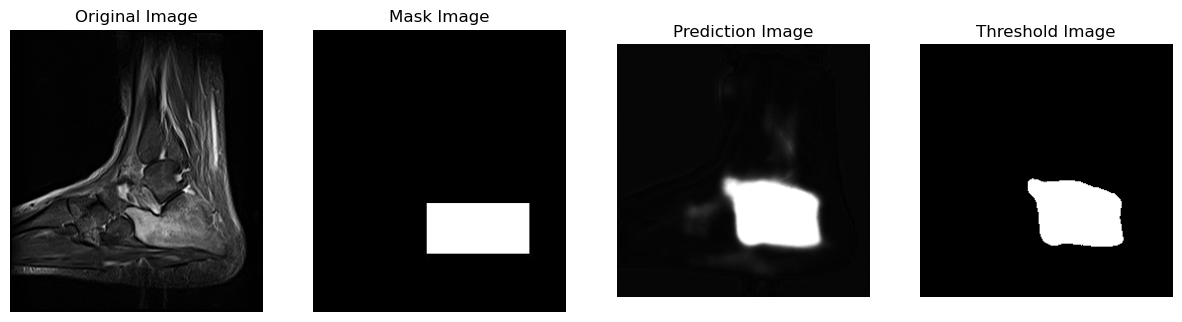

P020 SAGIR_014.jpg


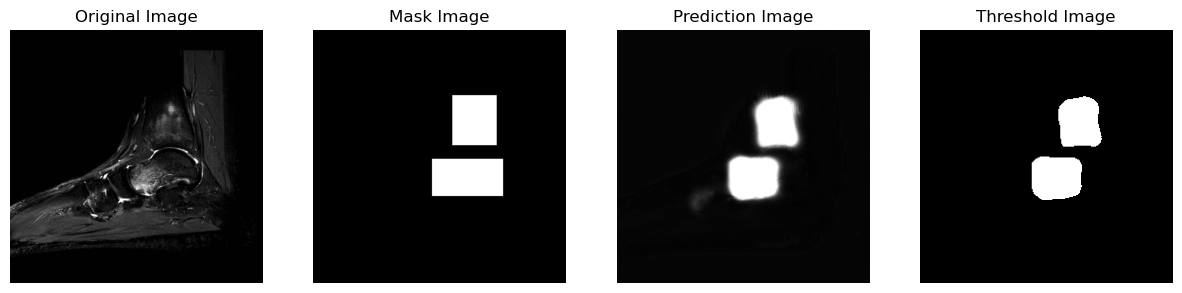

In [45]:
# plot few results
agent_test_l2.printPrediction(loader=test_loader_l2, idx=11, preds=predictions_test_l2)

### Experiment with DiceLoss

Dice coefficient=  2×intersection + smooth / sum of predictions + sum of targets+smooth

Dice loss = 1- dice coefficient
​	

In [93]:
train_flag = True

 # initialize agent
agent_dc = Agent.Agent(train_flag,img_dir=train_dir,msk_dir=mask_dir,folder_path=folder_path, val_dir=val_dir, msk_dir_val=mask_dir_val, 
                  state='new', num_epochs=200, batchSize=30, bilinear=False)
agent_dc.initializeUnet()

# load custom dataset
train_loader_dc, val_loader_dc = agent_dc.loadCustomData(augment=True)

mps
Initialize Custom Data
Augmentation Initialized
Augmentation ::: True
Train flag:: True
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/train_data_SAGIR
Total Size ::: 1118
Initialize Custom Data
Total Size val::: 116


In [94]:
loss_df_dc, prediction_batch_dc, iou_sore_df_dc, loss_val_df_dc, iou_score_val_df_dc, prediction_batch_val_dc = agent_dc.runModel(train_loader_dc, 
                                                                                                                                  val_loader_dc,
                                                                                                                                  earlyStop=True, 
                                                                                                                                  L2Reg=True,
                                                                                                                                  loss='DICE')

Epoch [1/200], Train( Loss: 0.8743, IoU_score: 0.0538 ) ::: Validation ( Loss: 0.9141, IoU_score: 0.0454 )
Epoch [2/200], Train( Loss: 0.8490, IoU_score: 0.0538 ) ::: Validation ( Loss: 0.8715, IoU_score: 0.0454 )
Epoch [3/200], Train( Loss: 0.8326, IoU_score: 0.0800 ) ::: Validation ( Loss: 0.8639, IoU_score: 0.0478 )
Epoch [4/200], Train( Loss: 0.8143, IoU_score: 0.1132 ) ::: Validation ( Loss: 0.8625, IoU_score: 0.0957 )
Epoch [5/200], Train( Loss: 0.7930, IoU_score: 0.1273 ) ::: Validation ( Loss: 0.8330, IoU_score: 0.1173 )
Epoch [6/200], Train( Loss: 0.7637, IoU_score: 0.1679 ) ::: Validation ( Loss: 0.8049, IoU_score: 0.1486 )
Epoch [7/200], Train( Loss: 0.7216, IoU_score: 0.2353 ) ::: Validation ( Loss: 0.7496, IoU_score: 0.2708 )
Epoch [8/200], Train( Loss: 0.6697, IoU_score: 0.3069 ) ::: Validation ( Loss: 0.7882, IoU_score: 0.2358 )
EarlyStopping counter: 1 out of 5
Epoch [9/200], Train( Loss: 0.6068, IoU_score: 0.3850 ) ::: Validation ( Loss: 0.7428, IoU_score: 0.1526 )
Epo

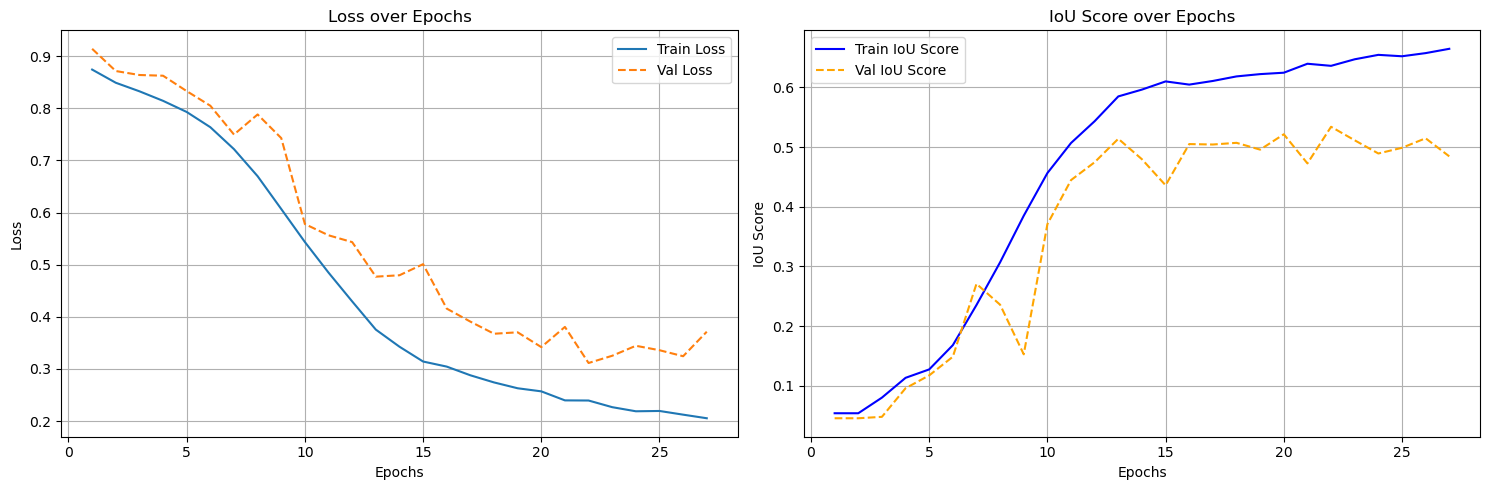

In [95]:
# plot the training and validaiton data
plotResult.plotLoss_IOU(loss_df_dc, iou_sore_df_dc, loss_val_df_dc, iou_score_val_df_dc)

In [96]:
# write the data to the files and save the net
w_path = os.path.join(folder_path,"Result","IoUScore_dc.csv")
agent_dc.writeRun(iou_sore_df_dc,w_path)

# write the loss data
w_path = os.path.join(folder_path,"Result","LossOutput_dc.csv")
agent_dc.writeRun(loss_df_dc,w_path)

# save the net
agent_dc.save_net(file_name='UNet_dc')

### Test the model dice loss

In [97]:
train_flag = False

# initialize the agent , pass the batchSize as the no.of images in the test , state as old to initialize existing model
agent_test_dc = Agent.Agent(train_flag,img_dir=test_dir,msk_dir=mask_dir_test,folder_path=folder_path, state='old',num_epochs=1, batchSize=186, bilinear=False)
agent_test_dc.initializeUnet('UNet_dcJul 02, 2024 02_10PM')

test_loader_dc = agent_test_dc.loadCustomData()

mps
Initialize Custom Data
Augmentation ::: False
Train flag:: False
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/test_data_SAGIR
Total Size ::: 185


0.5672457593906617
Iou Score ::::0.5672457593906617
185


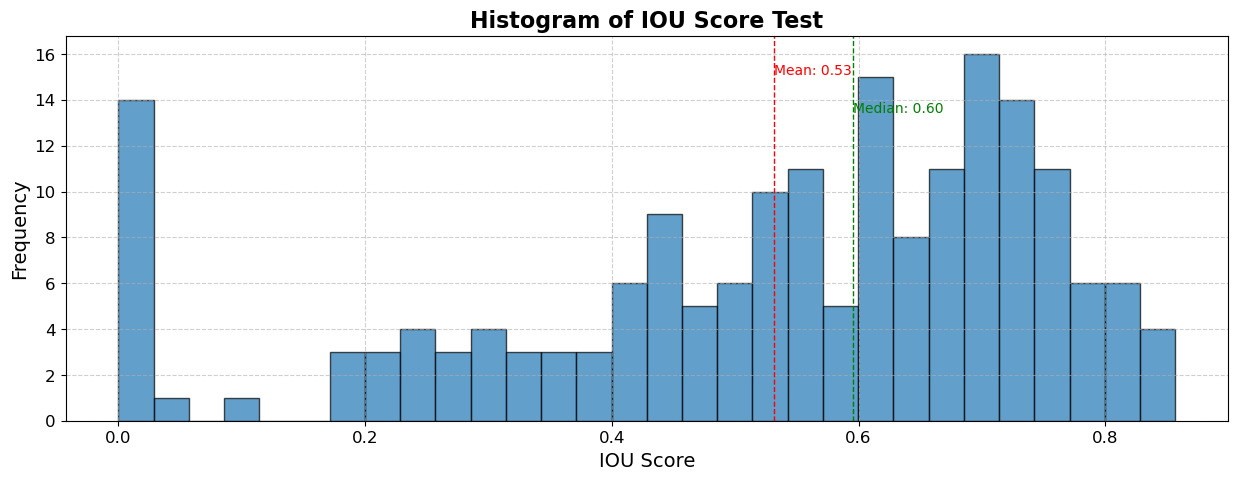

In [98]:
prediction_batch_test_dc, iou_score_batch_test_dc, iou_score_each_test_dc = agent_test_dc.runModel(test_loader_dc)
print(len(iou_score_each_test_dc))
# plot the testing iou histogram
plotResult.plotTest_IOU(iou_score_each_test_dc)

In [99]:
# join the predictions of the test
predictions_test_dc = list(chain(*prediction_batch_test_dc))

P044 SAGIR_006.jpg


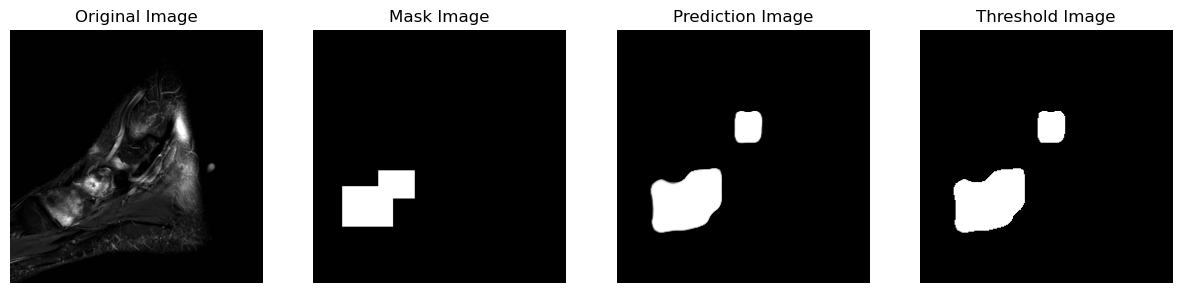

P044 SAGIR_012.jpg


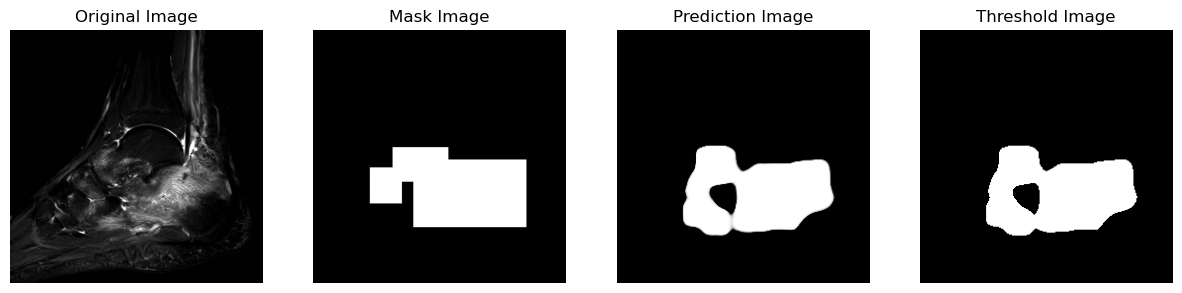

P044 SAGIR_013.jpg


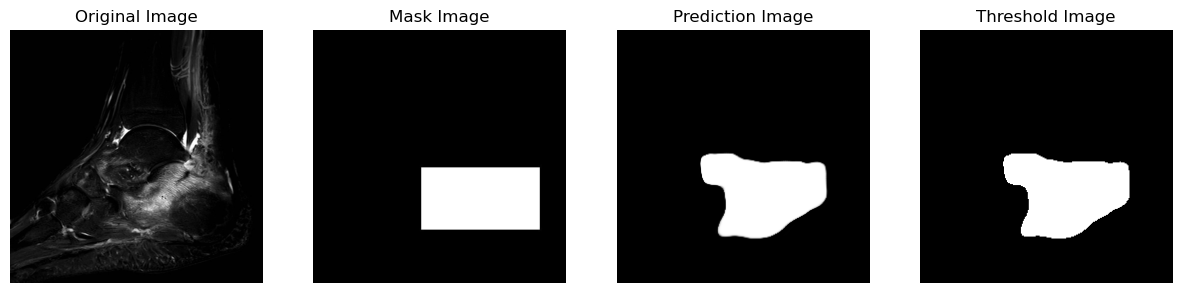

P044 SAGIR_007.jpg


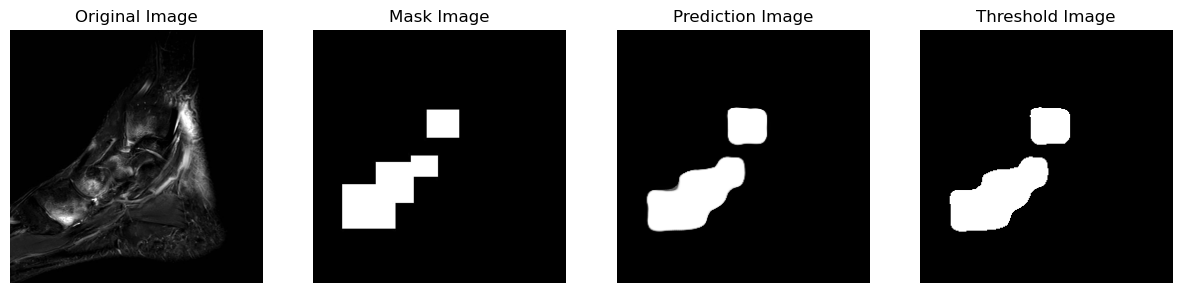

P053 SAGIR_013.jpg


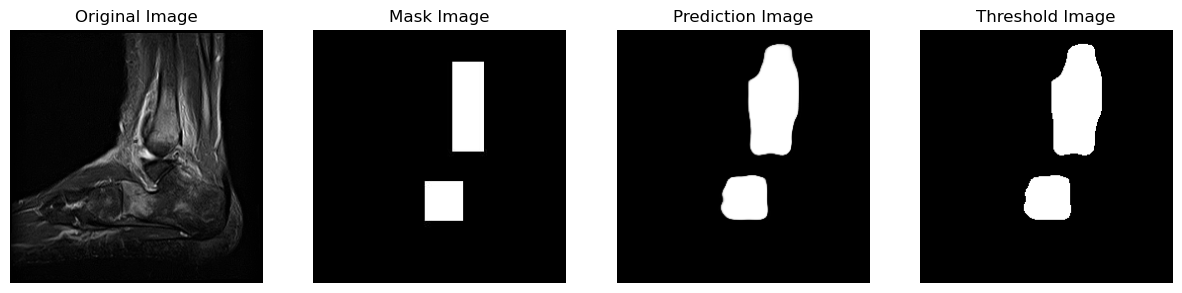

P020 SAGIR_015.jpg


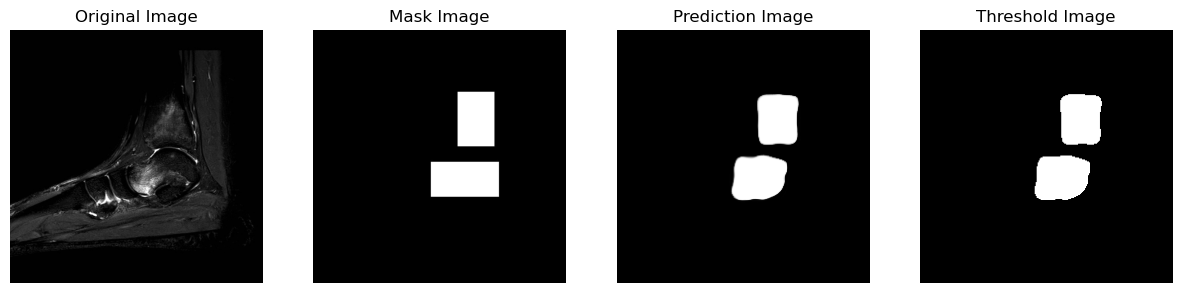

P027 SAGIR_011.jpg


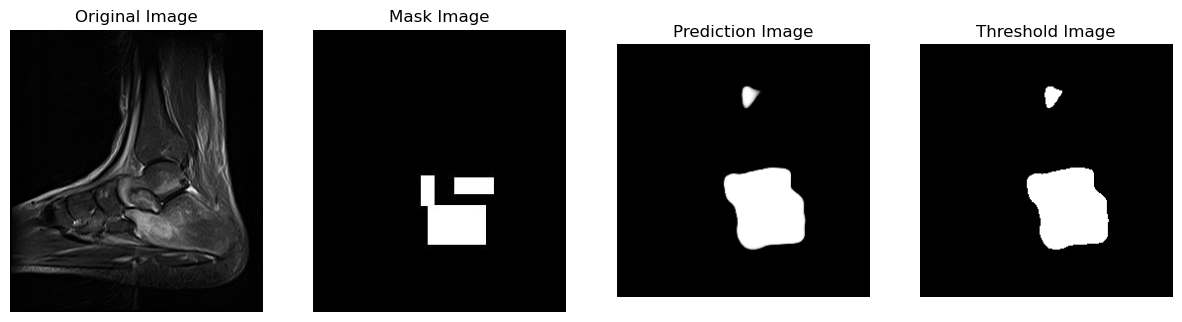

P057 SAGIR_012.jpg


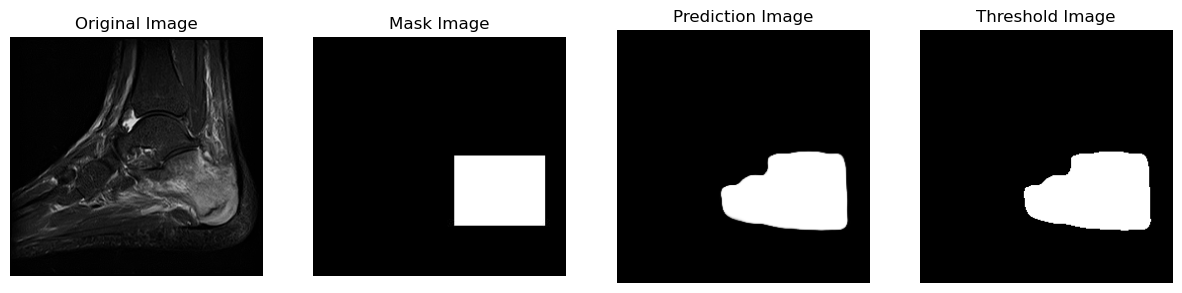

P056 SAGIR_008.jpg


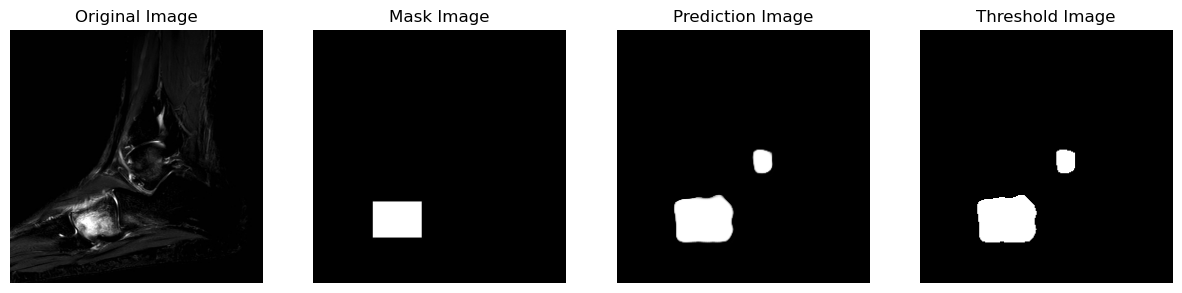

P057 SAGIR_016.jpg


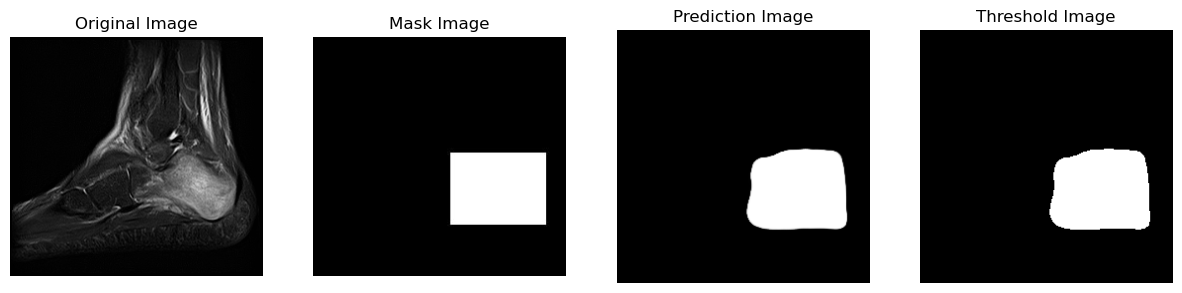

In [100]:
# plot few results
agent_test_dc.printPrediction(loader=test_loader_dc, idx=22, preds=predictions_test_dc)

### Train model with bilinear interpolation

In [110]:
train_flag = True

 # initialize agent
agent_dc_bl = Agent.Agent(train_flag,img_dir=train_dir,msk_dir=mask_dir,folder_path=folder_path, val_dir=val_dir, msk_dir_val=mask_dir_val, 
                  state='new', num_epochs=200, batchSize=30, bilinear=True)
agent_dc_bl.initializeUnet()

# load custom dataset
train_loader_dc_bl, val_loader_dc_bl = agent_dc_bl.loadCustomData(augment=True)

mps
Initialize Custom Data
Augmentation Initialized
Augmentation ::: True
Train flag:: True
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/train_data_SAGIR
Total Size ::: 1118
Initialize Custom Data
Total Size val::: 116


In [111]:
loss_df_dc_bl, prediction_batch_dc_bl, iou_sore_df_dc_bl, loss_val_df_dc_bl, iou_score_val_df_dc_bl, prediction_batch_val_dc_bl = agent_dc_bl.runModel(train_loader_dc_bl, 
                                                                                                                                  val_loader_dc_bl,
                                                                                                                                  earlyStop=True, 
                                                                                                                                  L2Reg=True,
                                                                                                                                  loss='DICE')

Epoch [1/200], Train( Loss: 0.8755, IoU_score: 0.0844 ) ::: Validation ( Loss: 0.9092, IoU_score: 0.0454 )
Epoch [2/200], Train( Loss: 0.8372, IoU_score: 0.1145 ) ::: Validation ( Loss: 0.8698, IoU_score: 0.1026 )
Epoch [3/200], Train( Loss: 0.8021, IoU_score: 0.1431 ) ::: Validation ( Loss: 0.8478, IoU_score: 0.1498 )
Epoch [4/200], Train( Loss: 0.7634, IoU_score: 0.1782 ) ::: Validation ( Loss: 0.8368, IoU_score: 0.2193 )
Epoch [5/200], Train( Loss: 0.7195, IoU_score: 0.2165 ) ::: Validation ( Loss: 0.8271, IoU_score: 0.1625 )
Epoch [6/200], Train( Loss: 0.6661, IoU_score: 0.2875 ) ::: Validation ( Loss: 0.6713, IoU_score: 0.3421 )
Epoch [7/200], Train( Loss: 0.6084, IoU_score: 0.3515 ) ::: Validation ( Loss: 0.6887, IoU_score: 0.2129 )
EarlyStopping counter: 1 out of 5
Epoch [8/200], Train( Loss: 0.5361, IoU_score: 0.4923 ) ::: Validation ( Loss: 0.5896, IoU_score: 0.4422 )
Epoch [9/200], Train( Loss: 0.4648, IoU_score: 0.5478 ) ::: Validation ( Loss: 0.5247, IoU_score: 0.4524 )
Epo

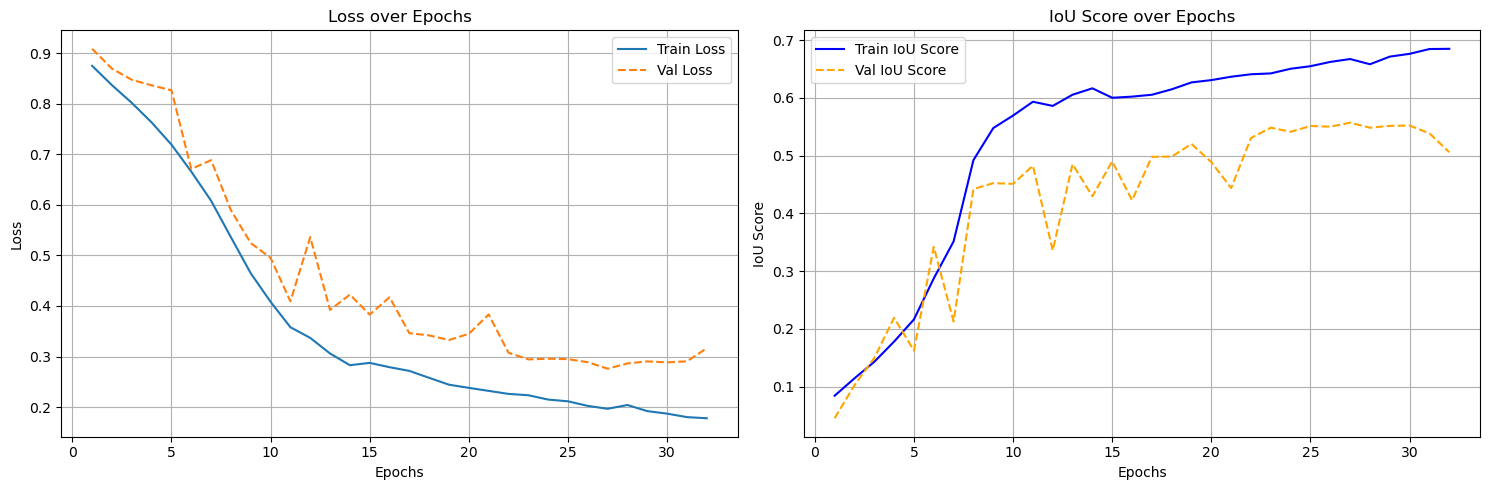

In [112]:
# plot the training and validaiton data
plotResult.plotLoss_IOU(loss_df_dc_bl, iou_sore_df_dc_bl, loss_val_df_dc_bl, iou_score_val_df_dc_bl)

In [113]:
# write the data to the files and save the net
w_path = os.path.join(folder_path,"Result","IoUScore_dc_bl.csv")
agent_dc.writeRun(iou_sore_df_dc_bl,w_path)

# write the loss data
w_path = os.path.join(folder_path,"Result","LossOutput_dc_bl.csv")
agent_dc.writeRun(loss_df_dc_bl,w_path)

# save the net
agent_dc.save_net(file_name='UNet_dc_bl')

### Test the bilinear model

In [116]:
train_flag = False

# initialize the agent , pass the batchSize as the no.of images in the test , state as old to initialize existing model
agent_test_dc_bl = Agent.Agent(train_flag,img_dir=test_dir,msk_dir=mask_dir_test,folder_path=folder_path, state='old',num_epochs=1, batchSize=185, bilinear=True)
agent_test_dc_bl.initializeUnet('UNet_dc_blJul 16, 2024 11_25PM')

test_loader_dc_bl = agent_test_dc_bl.loadCustomData()

mps
Initialize Custom Data
Augmentation ::: False
Train flag:: False
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/test_data_SAGIR
Total Size ::: 185


0.5672457593906617
Iou Score ::::0.5672457593906617
185


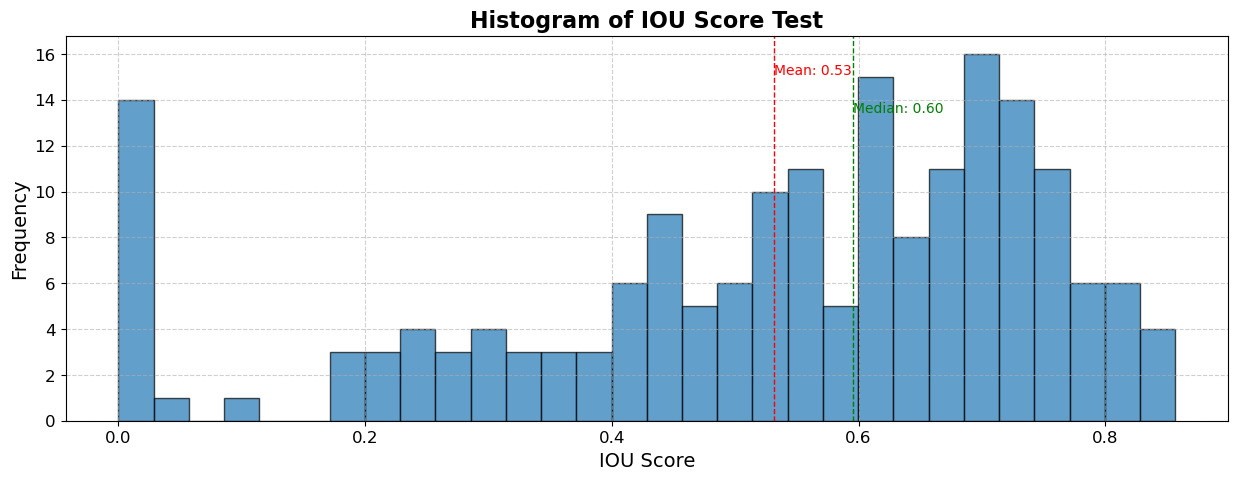

In [117]:
prediction_batch_test_dc_bl, iou_score_batch_test_dc_bl, iou_score_each_test_dc_bl = agent_test_dc_bl.runModel(test_loader_dc_bl)
print(len(iou_score_each_test_dc_bl))
# plot the testing iou histogram
plotResult.plotTest_IOU(iou_score_each_test_dc_bl)

In [108]:
# join the predictions of the test
predictions_test_dc_bl = list(chain(*prediction_batch_test_dc_bl))

P044 SAGIR_006.jpg


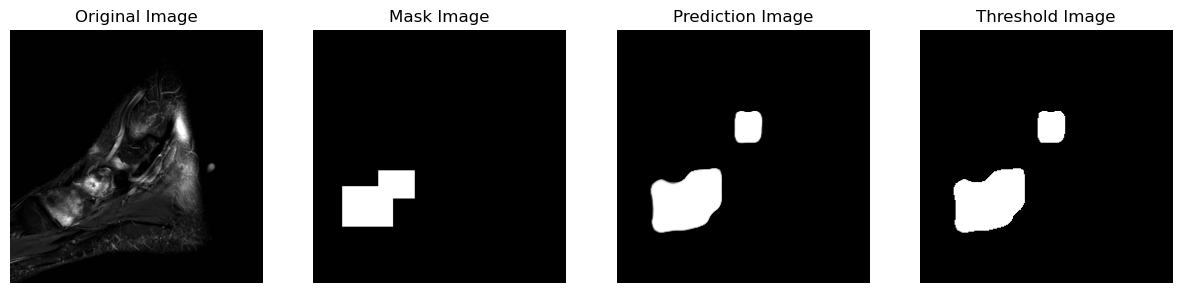

P044 SAGIR_012.jpg


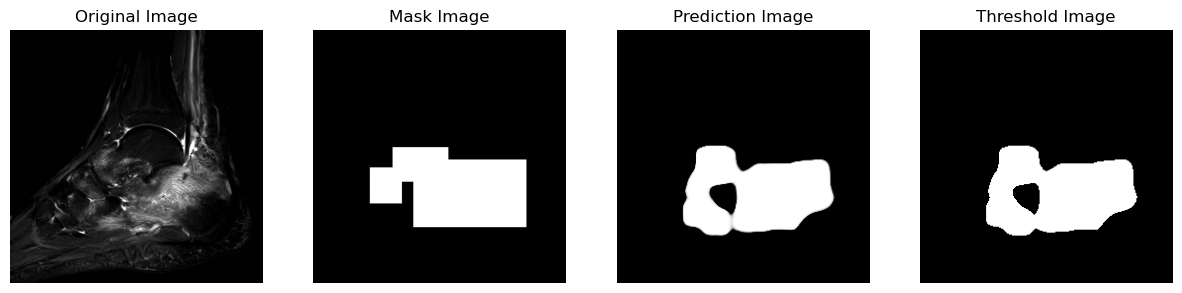

P044 SAGIR_013.jpg


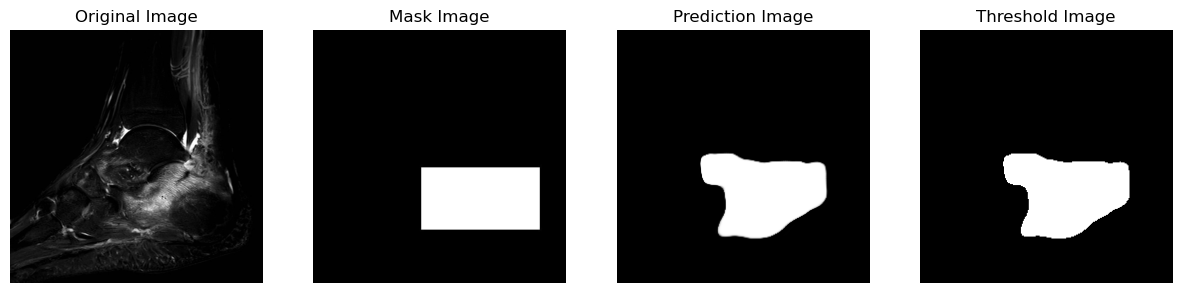

P044 SAGIR_007.jpg


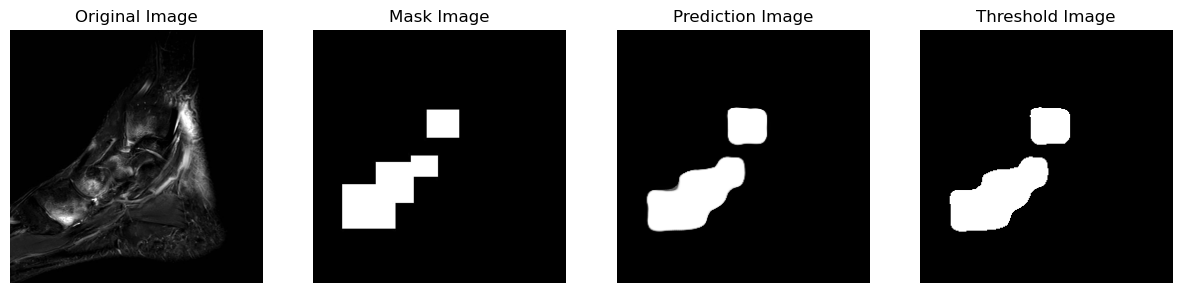

P053 SAGIR_013.jpg


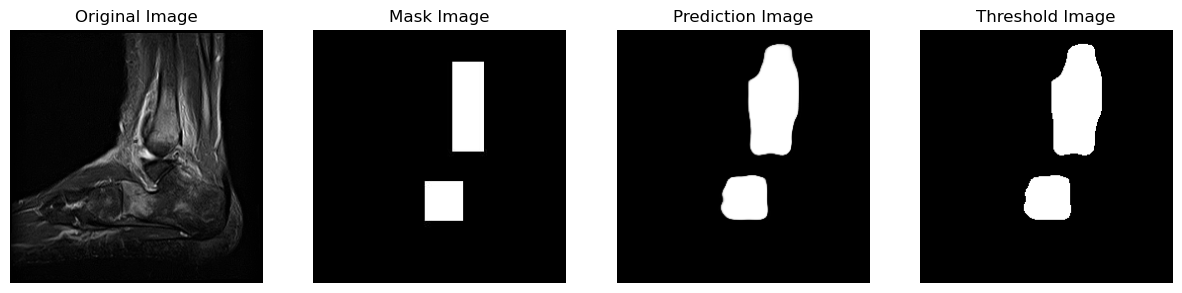

P020 SAGIR_015.jpg


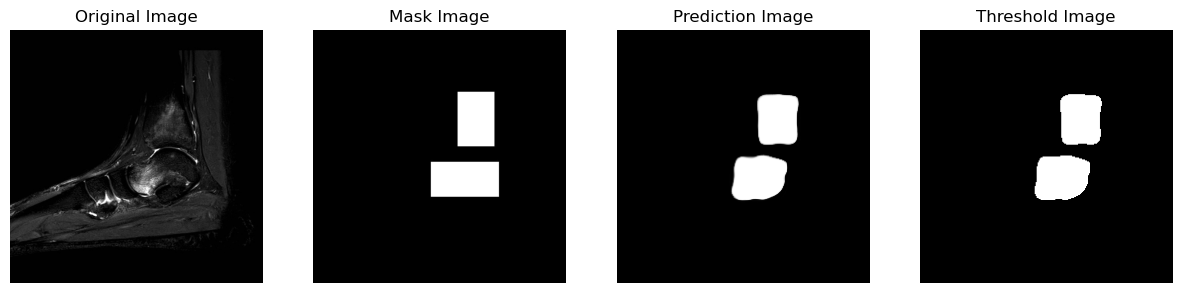

P027 SAGIR_011.jpg


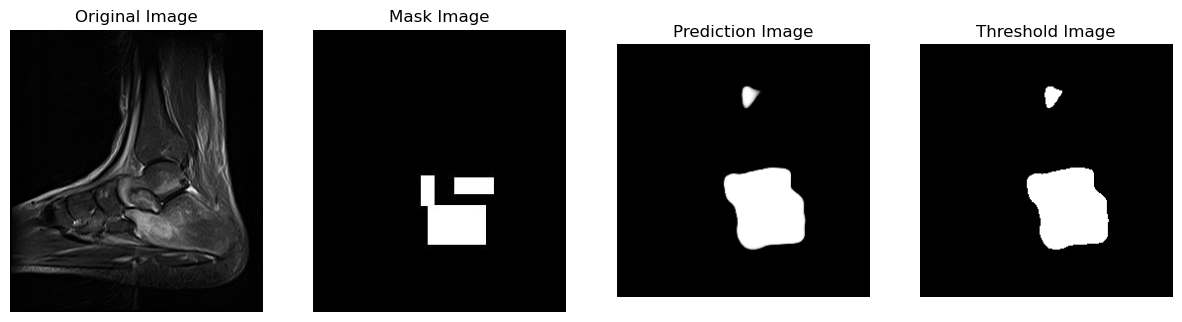

P057 SAGIR_012.jpg


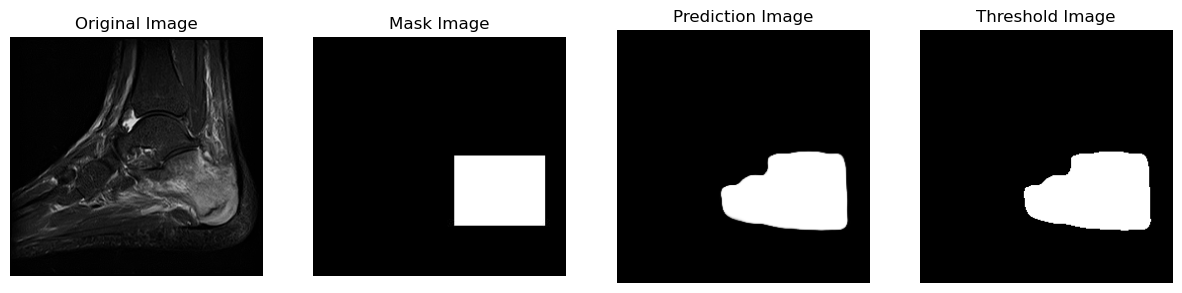

P056 SAGIR_008.jpg


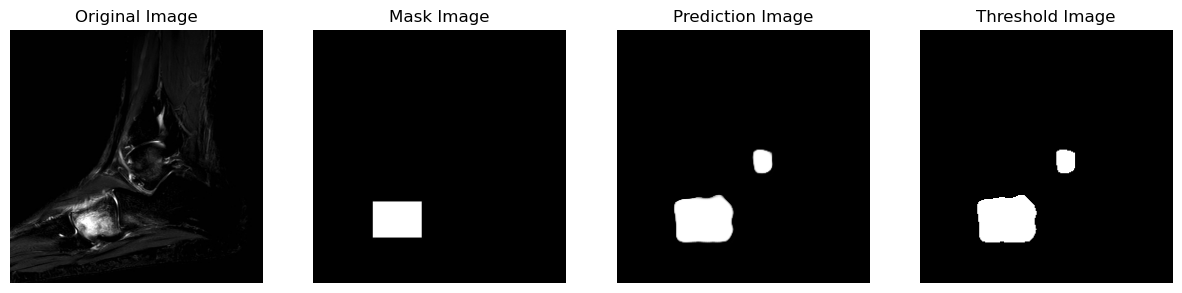

P057 SAGIR_016.jpg


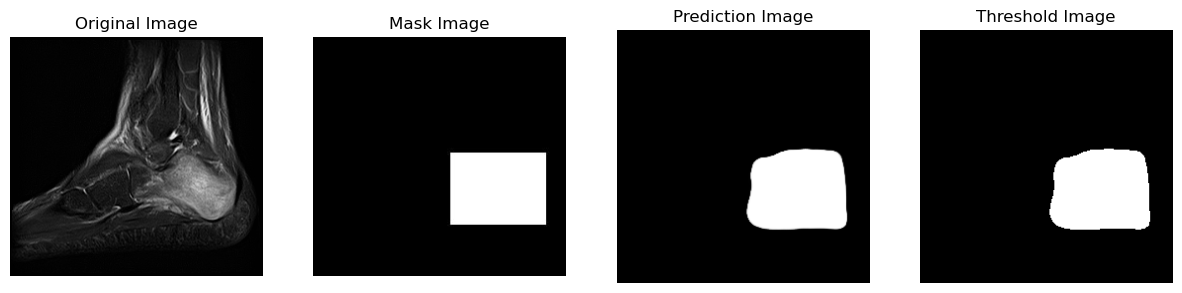

In [109]:
# plot few results
agent_test_dc_bl.printPrediction(loader=test_loader_dc_bl, idx=22, preds=predictions_test_dc_bl)

### Test model with healthy images to copmare results

In [7]:
import os
from PIL import Image

In [17]:
healthy_dir = {}

healthy_dir['SAGIR'] = os.path.join(folder_path, "healthy_SAGIR")
healthy_dir['SAGT1'] = os.path.join(folder_path, "healthy_SAGT1")

In [18]:
healthy_mask_dir = {}
healthy_mask_SAGT1 = os.path.join(folder_path, 'healthy_mask_SAGT1')
healthy_mask_SAGIR = os.path.join(folder_path, 'healthy_mask_SAGIR')

healthy_mask_dir['SAGIR'] = healthy_mask_SAGIR
healthy_mask_dir['SAGT1'] = healthy_mask_SAGT1


In [28]:
img = 'SAGIR'
# set the directories
test_dir = healthy_dir[img]
mask_dir_test = healthy_mask_dir[img]

# create heanlthy black mask for each healthy files
counter = 0
for root, dir, files in os.walk(test_dir):
     for file_name in files:
          
          file_path = os.path.join(root, file_name)
            
          file = Image.open(file_path)
          # get the height and width
          wd, ht = file.size

          # create a balck mask
          # Create an empty image with a white background
          mask_image = Image.new("L", (wd, ht), 0)  # 'L' mode is for grayscale (0-255)

          # save the mask
          mask_image.save(f"{mask_dir_test}/{file_name}")
          counter +=1  


print(f"Total Mask Created::{counter}")

Total Mask Created::1483


In [34]:
train_flag = False

# initialize the agent , pass the batchSize as the no.of images in the test , state as old to initialize existing model
agent_test_healthy = Agent.Agent(train_flag,img_dir=test_dir,msk_dir=mask_dir_test,folder_path=folder_path, state='old',
                                 num_epochs=1, batchSize=186, bilinear=False)
agent_test_healthy.initializeUnet('UNet_dcJul 02, 2024 02_10PM')

test_loader_healthy = agent_test_healthy.loadCustomData()

mps
Initialize Custom Data
Augmentation ::: False
Train flag:: False
loader root directory:: /Users/jiten/Masters/WorkPlace/MRI Fractures Project/healthy_SAGIR
Total Size ::: 1483


In [35]:
prediction_batch_test_hl, iou_score_batch_test_hl, iou_score_each_test_hl = agent_test_healthy.runModel(test_loader_healthy)
print(len(iou_score_each_test_hl))
# plot the testing iou histogram
plotResult.plotTest_IOU(iou_score_each_test_hl)

RuntimeError: MPS backend out of memory (MPS allocated: 26.93 GB, other allocations: 1.72 MB, max allowed: 27.20 GB). Tried to allocate 372.00 MB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).